# Finalized results (MODIS-EVI) for train, test, val and corresponding figures

## Importing Data

In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/ # change this to the root working directory

Mounted at /content/drive
/content/drive/MyDrive


In [ ]:
import pandas as pd

In [ ]:
file_path = 'Modeling VIs in Tallgrass/data/P13_Cleaned_Data.csv'
df = pd.read_csv(file_path)
df

,Unnamed: 0,DATE,Tavg_mean,Havg_mean,Vdef_mean,Hdeg_mean,Cdeg_mean,Wspd_mean,Atot_mean,Rain_sum,Savg_mean,Bavg_mean,Tr05_mean,Tr25_mean,Tr60_mean,MODIS_EVI,LSWI
0,6,2000-02-18,52.10875,71.93625,4.46000,12.16500,0.00000,14.49375,13.258750,1.06,50.37625,50.81500,1.863600,1.581400,1.504100,0.254,-0.111
1,7,2000-02-26,48.71250,66.61750,5.25500,16.66875,0.00000,12.51125,14.832385,0.78,49.21875,49.43125,1.671738,1.570663,1.491400,0.211,-0.136
2,8,2000-03-05,50.03750,72.90625,4.11375,14.25750,0.00000,13.49750,17.770000,0.71,51.34375,51.30125,1.562450,1.557400,1.478662,0.231,-0.092
3,9,2000-03-13,47.88250,81.58250,3.14125,15.82625,0.00000,10.42750,12.791250,0.95,50.05750,49.97750,1.594888,1.547525,1.471650,0.170,-0.205
4,10,2000-03-21,57.95000,75.16625,5.15500,6.97000,0.00000,10.11750,16.667500,2.39,56.53125,56.36875,1.507513,1.531750,1.465475,0.187,-0.206
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1069,1090,2023-09-14,71.42375,73.00250,8.62500,0.00000,6.97375,8.59875,15.427500,0.99,71.31000,71.28000,1.520763,3.208450,3.473537,0.379,0.084
1070,1091,2023-09-22,75.57250,66.09000,12.62500,0.00000,11.76625,9.57000,18.105000,0.39,72.30125,75.01625,1.620875,2.699000,3.452688,0.446,0.163
1071,1092,2023-09-30,68.66625,63.53250,10.45000,2.35625,7.10750,8.96625,15.098750,1.52,69.67000,72.41000,1.813212,2.058113,3.441438,0.426,0.125
1072,1093,2023-10-08,61.79500,65.17125,7.83500,4.42000,1.91250,12.27000,15.991250,0.00,64.46500,64.92125,1.711912,1.664287,3.413925,0.401,0.105


In [ ]:
# Filter observations where EVI < -0.07
filtered_indices = df[df['MODIS_EVI'] < -0.07].index
filtered_indices

Index([456], dtype='int64')

# EVI

## Train Test Splitting

In [ ]:
# Training data from 2000-2021 and testing data from 2022-2023
train_test = df[df['DATE'] < '2022-01-01']
validation = df[df['DATE'] >= '2022-01-01']

In [ ]:
X = train_test[['Tavg_mean', 'Havg_mean', 'Vdef_mean', 'Hdeg_mean', 'Cdeg_mean',
       'Wspd_mean', 'Atot_mean', 'Rain_sum', 'Savg_mean', 'Bavg_mean',
       'Tr05_mean', 'Tr25_mean', 'Tr60_mean']]
y = train_test[['MODIS_EVI']]

In [ ]:
# Filter observations where EVI < -0.07
filtered_indices = y[y['MODIS_EVI'] < -0.07].index

# Print the indices of filtered observations
print(filtered_indices)

# Print the specific observations
print(y.loc[filtered_indices])

Index([456], dtype='int64')
     MODIS_EVI
456     -0.085


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_val = validation[['Tavg_mean', 'Havg_mean', 'Vdef_mean', 'Hdeg_mean', 'Cdeg_mean',
       'Wspd_mean', 'Atot_mean', 'Rain_sum', 'Savg_mean', 'Bavg_mean',
       'Tr05_mean', 'Tr25_mean', 'Tr60_mean']]
y_val = validation[['MODIS_EVI']]

In [ ]:
len(X_train), len(X_test), len(X_val)

(802, 201, 71)

In [ ]:
# Filter observations where EVI < -0.07
filtered_indices = y_test[y_test['MODIS_EVI'] < -0.07].index

# Print the indices of filtered observations
print(filtered_indices)

# Print the specific observations
print(y.loc[filtered_indices])

Index([456], dtype='int64')
     MODIS_EVI
456     -0.085


In [ ]:
# Remove observation with index 456 from X_test and y_test
X_test = X_test.drop(index=456)
y_test = y_test.drop(index=456)

In [ ]:
len(X_train), len(X_test), len(X_val)

(802, 200, 71)

## Importing Models

In [ ]:
import pickle

# Load the trained model
models_base_path = 'Modeling VIs in Tallgrass/models/evi/'

with open(models_base_path + 'linear_regression_evi.pkl', 'rb') as lr_file:
    evi_lr_model = pickle.load(lr_file)

with open(models_base_path + 'tuned_linear_evi.pkl', 'rb') as tuned_lr_file:
    evi_tuned_lr_model = pickle.load(tuned_lr_file)

with open(models_base_path + 'bayesian_ridge_evi.pkl', 'rb') as br_file:
    evi_br_model = pickle.load(br_file)

with open(models_base_path + 'tuned_br_evi.pkl', 'rb') as tuned_br_file:
    evi_tuned_br_model = pickle.load(tuned_br_file)

with open(models_base_path + 'elastic_net_evi.pkl', 'rb') as en_file:
    evi_en_model = pickle.load(en_file)

with open(models_base_path + 'tuned_en_evi.pkl', 'rb') as tuned_en_file:
    evi_tuned_en_model = pickle.load(tuned_en_file)

with open(models_base_path + 'xgboost_model_evi.pkl', 'rb') as xgboost_file:
    evi_xgboost_model = pickle.load(xgboost_file)

with open(models_base_path + 'tuned_xgboost_evi.pkl', 'rb') as tuned_xgboost_file:
    evi_tuned_xgboost_model = pickle.load(tuned_xgboost_file)

with open(models_base_path + 'random_forest_evi.pkl', 'rb') as rf_file:
    evi_rf_model = pickle.load(rf_file)

with open(models_base_path + 'tuned_rf_evi.pkl', 'rb') as tuned_rf_file:
    evi_tuned_rf_model = pickle.load(tuned_rf_file)

with open(models_base_path + 'decision_tree_evi.pkl', 'rb') as dt_file:
    evi_dt_model = pickle.load(dt_file)

with open(models_base_path + 'svr_evi.pkl', 'rb') as svr_file:
    evi_svr_model = pickle.load(svr_file)

with open(models_base_path + 'tuned_svr_evi.pkl', 'rb') as tuned_svr_file:
    evi_tuned_svr_model = pickle.load(tuned_svr_file)

with open(models_base_path + 'knn_evi.pkl', 'rb') as knn_file:
    evi_knn_model = pickle.load(knn_file)

with open(models_base_path + 'tuned_knn_evi.pkl', 'rb') as tuned_knn_file:
    evi_tuned_knn_model = pickle.load(tuned_knn_file)

with open(models_base_path + 'ann_evi.pkl', 'rb') as ann_file:
    evi_ann_model = pickle.load(ann_file)

with open(models_base_path + 'tuned_ann_evi.pkl', 'rb') as tuned_ann_file:
    evi_tuned_ann_model = pickle.load(tuned_ann_file)

with open(models_base_path + 'cnn_evi.pkl', 'rb') as cnn_file:
    evi_cnn_model = pickle.load(cnn_file)

with open(models_base_path + 'tuned_cnn_evi.pkl', 'rb') as tuned_cnn_file:
    evi_tuned_cnn_model = pickle.load(tuned_cnn_file)

with open(models_base_path + 'rnn_evi.pkl', 'rb') as rnn_file:
    evi_rnn_model = pickle.load(rnn_file)

with open(models_base_path + 'tuned_rnn_evi.pkl', 'rb') as tuned_rnn_file:
    evi_tuned_rnn_model = pickle.load(tuned_rnn_file)

with open(models_base_path + 'lstm_evi.pkl', 'rb') as lstm_file:
    evi_lstm_model = pickle.load(lstm_file)

with open(models_base_path + 'tuned_lstm_evi.pkl', 'rb') as tuned_lstm_file:
    evi_tuned_lstm_model = pickle.load(tuned_lstm_file)

In [ ]:
# For ANN and CNN
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_stand = scaler.fit_transform(X_train)
X_test_stand = scaler.transform(X_test)
X_val_stand = scaler.transform(X_val)

# For RNN
X_train_rnn = X_train_stand.reshape(X_train_stand.shape[0], 1, X_train_stand.shape[1])
X_test_rnn = X_test_stand.reshape(X_test_stand.shape[0], 1, X_test_stand.shape[1])
X_val_rnn = X_val_stand.reshape(X_val_stand.shape[0], 1, X_val_stand.shape[1])

# For LSTM
timesteps=1
X_train_lstm = X_train_stand.reshape(X_train_stand.shape[0], timesteps, X_train_stand.shape[1])
X_test_lstm = X_test_stand.reshape(X_test_stand.shape[0], timesteps, X_test_stand.shape[1])
X_val_lstm = X_val_stand.reshape(X_val_stand.shape[0], timesteps, X_val_stand.shape[1])

In [ ]:
# Fit Bayesian model first
evi_br_model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


BayesianRidge()

In [ ]:
lr_train_pred = evi_lr_model.predict(X_train)
lr_tuned_train_pred = evi_tuned_lr_model.predict(X_train)
br_train_pred = evi_br_model.predict(X_train)
br_tuned_train_pred = evi_tuned_br_model.predict(X_train)
en_train_pred = evi_en_model.predict(X_train)
en_tuned_train_pred = evi_tuned_en_model.predict(X_train)
xgboost_train_pred = evi_xgboost_model.predict(X_train)
xgboost_tuned_train_pred = evi_tuned_xgboost_model.predict(X_train)
rf_train_pred = evi_rf_model.predict(X_train)
rf_tuned_train_pred = evi_tuned_rf_model.predict(X_train)
dt_train_pred = evi_dt_model.predict(X_train)
svr_train_pred = evi_svr_model.predict(X_train)
svr_tuned_train_pred = evi_tuned_svr_model.predict(X_train)
knn_train_pred = evi_knn_model.predict(X_train)
knn_tuned_train_pred = evi_tuned_knn_model.predict(X_train)
ann_train_pred = evi_ann_model.predict(X_train_stand)
ann_tuned_train_pred = evi_tuned_ann_model.predict(X_train_stand)
cnn_train_pred = evi_cnn_model.predict(X_train_stand)
cnn_tuned_train_pred = evi_tuned_cnn_model.predict(X_train_stand)
rnn_train_pred = evi_rnn_model.predict(X_train_rnn)
rnn_tuned_train_pred = evi_tuned_rnn_model.predict(X_train_rnn)
lstm_train_pred = evi_lstm_model.predict(X_train_lstm)
lstm_tuned_train_pred = evi_tuned_lstm_model.predict(X_train_lstm)

26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step


In [ ]:
lr_test_pred = evi_lr_model.predict(X_test)
lr_tuned_test_pred = evi_tuned_lr_model.predict(X_test)
br_test_pred = evi_br_model.predict(X_test)
br_tuned_test_pred = evi_tuned_br_model.predict(X_test)
en_test_pred = evi_en_model.predict(X_test)
en_tuned_test_pred = evi_tuned_en_model.predict(X_test)
xgboost_test_pred = evi_xgboost_model.predict(X_test)
xgboost_tuned_test_pred = evi_tuned_xgboost_model.predict(X_test)
rf_test_pred = evi_rf_model.predict(X_test)
rf_tuned_test_pred = evi_tuned_rf_model.predict(X_test)
dt_test_pred = evi_dt_model.predict(X_test)
svr_test_pred = evi_svr_model.predict(X_test)
svr_tuned_test_pred = evi_tuned_svr_model.predict(X_test)
knn_test_pred = evi_knn_model.predict(X_test)
knn_tuned_test_pred = evi_tuned_knn_model.predict(X_test)
ann_test_pred = evi_ann_model.predict(X_test_stand)
ann_tuned_test_pred = evi_tuned_ann_model.predict(X_test_stand)
cnn_test_pred = evi_cnn_model.predict(X_test_stand)
cnn_tuned_test_pred = evi_tuned_cnn_model.predict(X_test_stand)
rnn_test_pred = evi_rnn_model.predict(X_test_rnn)
rnn_tuned_test_pred = evi_tuned_rnn_model.predict(X_test_rnn)
lstm_test_pred = evi_lstm_model.predict(X_test_lstm)
lstm_tuned_test_pred = evi_tuned_lstm_model.predict(X_test_lstm)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


In [ ]:
lr_val_pred = evi_lr_model.predict(X_val)
lr_tuned_val_pred = evi_tuned_lr_model.predict(X_val)
br_val_pred = evi_br_model.predict(X_val)
br_tuned_val_pred = evi_tuned_br_model.predict(X_val)
en_val_pred = evi_en_model.predict(X_val)
en_tuned_val_pred = evi_tuned_en_model.predict(X_val)
xgboost_val_pred = evi_xgboost_model.predict(X_val)
xgboost_tuned_val_pred = evi_tuned_xgboost_model.predict(X_val)
rf_val_pred = evi_rf_model.predict(X_val)
rf_tuned_val_pred = evi_tuned_rf_model.predict(X_val)
dt_val_pred = evi_dt_model.predict(X_val)
svr_val_pred = evi_svr_model.predict(X_val)
svr_tuned_val_pred = evi_tuned_svr_model.predict(X_val)
knn_val_pred = evi_knn_model.predict(X_val)
knn_tuned_val_pred = evi_tuned_knn_model.predict(X_val)
ann_val_pred = evi_ann_model.predict(X_val_stand)
ann_tuned_val_pred = evi_tuned_ann_model.predict(X_val_stand)
cnn_val_pred = evi_cnn_model.predict(X_val_stand)
cnn_tuned_val_pred = evi_tuned_cnn_model.predict(X_val_stand)
rnn_val_pred = evi_rnn_model.predict(X_val_rnn)
rnn_tuned_val_pred = evi_tuned_rnn_model.predict(X_val_rnn)
lstm_val_pred = evi_lstm_model.predict(X_val_lstm)
lstm_tuned_val_pred = evi_tuned_lstm_model.predict(X_val_lstm)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


## Training Results

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [ ]:
actual_evi_train = y_train[['MODIS_EVI']]

# Calculate evaluation metrics
evi_mse_lr_train = mean_squared_error(actual_evi_train, lr_train_pred)
evi_mae_lr_train = mean_absolute_error(actual_evi_train, lr_train_pred)
evi_rmse_lr_train = mean_squared_error(actual_evi_train, lr_train_pred, squared=False)
evi_r2_lr_train = r2_score(actual_evi_train, lr_train_pred)

# Print the evaluation metrics
print('MSE:', evi_mse_lr_train)
print('MAE:', evi_mae_lr_train)
print('RMSE:', evi_rmse_lr_train)
print('R2 score:', evi_r2_lr_train)

MSE: 0.004420156128017329
MAE: 0.0513832565693992
RMSE: 0.06648425473762437
R2 score: 0.7595328770753145


In [ ]:
# Calculate evaluation metrics
evi_mse_lr_tuned_train = mean_squared_error(actual_evi_train, lr_tuned_train_pred)
evi_mae_lr_tuned_train = mean_absolute_error(actual_evi_train, lr_tuned_train_pred)
evi_rmse_lr_tuned_train = mean_squared_error(actual_evi_train, lr_tuned_train_pred, squared=False)
evi_r2_lr_tuned_train = r2_score(actual_evi_train, lr_tuned_train_pred)

# Print the evaluation metrics
print('MSE:', evi_mse_lr_tuned_train)
print('MAE:', evi_mae_lr_tuned_train)
print('RMSE:', evi_rmse_lr_tuned_train)
print('R2 score:', evi_r2_lr_tuned_train)

MSE: 0.004420156128017329
MAE: 0.0513832565693992
RMSE: 0.06648425473762437
R2 score: 0.7595328770753145


In [ ]:
# Calculate evaluation metrics
evi_mse_br_train = mean_squared_error(actual_evi_train, br_train_pred)
evi_mae_br_train = mean_absolute_error(actual_evi_train, br_train_pred)
evi_rmse_br_train = mean_squared_error(actual_evi_train, br_train_pred, squared=False)
evi_r2_br_train = r2_score(actual_evi_train, br_train_pred)

# Print the evaluation metrics
print('MSE:', evi_mse_br_train)
print('MAE:', evi_mae_br_train)
print('RMSE:', evi_rmse_br_train)
print('R2 score:', evi_r2_br_train)

MSE: 0.004434285859923852
MAE: 0.05152376503934647
RMSE: 0.06659043369676948
R2 score: 0.7587641856805192


In [ ]:
# Calculate evaluation metrics
evi_mse_br_tuned_train = mean_squared_error(actual_evi_train, br_tuned_train_pred)
evi_mae_br_tuned_train = mean_absolute_error(actual_evi_train, br_tuned_train_pred)
evi_rmse_br_tuned_train = mean_squared_error(actual_evi_train, br_tuned_train_pred, squared=False)
evi_r2_br_tuned_train = r2_score(actual_evi_train, br_tuned_train_pred)

# Print the evaluation metrics
print('MSE:', evi_mse_br_tuned_train)
print('MAE:', evi_mae_br_tuned_train)
print('RMSE:', evi_rmse_br_tuned_train)
print('R2 score:', evi_r2_br_tuned_train)

MSE: 0.0044305050788857265
MAE: 0.05149599390886956
RMSE: 0.06656203932336904
R2 score: 0.758969869260989


In [ ]:
# Calculate evaluation metrics
evi_mse_en_train = mean_squared_error(actual_evi_train, en_train_pred)
evi_mae_en_train = mean_absolute_error(actual_evi_train, en_train_pred)
evi_rmse_en_train = mean_squared_error(actual_evi_train, en_train_pred, squared=False)
evi_r2_en_train = r2_score(actual_evi_train, en_train_pred)

# Print the evaluation metrics
print('MSE:', evi_mse_en_train)
print('MAE:', evi_mae_en_train)
print('RMSE:', evi_rmse_en_train)
print('R2 score:', evi_r2_en_train)

MSE: 0.007785013304324259
MAE: 0.07148954688098415
RMSE: 0.08823272241251688
R2 score: 0.5764765548992132


In [ ]:
# Calculate evaluation metrics
evi_mse_en_tuned_train = mean_squared_error(actual_evi_train, en_tuned_train_pred)
evi_mae_en_tuned_train = mean_absolute_error(actual_evi_train, en_tuned_train_pred)
evi_rmse_en_tuned_train = mean_squared_error(actual_evi_train, en_tuned_train_pred, squared=False)
evi_r2_en_tuned_train = r2_score(actual_evi_train, en_tuned_train_pred)

# Print the evaluation metrics
print('MSE:', evi_mse_en_tuned_train)
print('MAE:', evi_mae_en_tuned_train)
print('RMSE:', evi_rmse_en_tuned_train)
print('R2 score:', evi_r2_en_tuned_train)

MSE: 0.004823441766351671
MAE: 0.054272810533530426
RMSE: 0.06945100263028368
R2 score: 0.7375931685314437


In [ ]:
# Calculate evaluation metrics
evi_mse_x_train = mean_squared_error(actual_evi_train, xgboost_train_pred)
evi_mae_x_train = mean_absolute_error(actual_evi_train, xgboost_train_pred)
evi_rmse_x_train = mean_squared_error(actual_evi_train, xgboost_train_pred, squared=False)
evi_r2_x_train = r2_score(actual_evi_train, xgboost_train_pred)

# Print the evaluation metrics
print('MSE:', evi_mse_x_train)
print('MAE:', evi_mae_x_train)
print('RMSE:', evi_rmse_x_train)
print('R2 score:', evi_r2_x_train)

MSE: 1.2024859527576839e-06
MAE: 0.0007798064697413084
RMSE: 0.0010965792049631817
R2 score: 0.9999345818724402


In [ ]:
# Calculate evaluation metrics
evi_mse_x_tuned_train = mean_squared_error(actual_evi_train, xgboost_tuned_train_pred)
evi_mae_x_tuned_train = mean_absolute_error(actual_evi_train, xgboost_tuned_train_pred)
evi_rmse_x_tuned_train = mean_squared_error(actual_evi_train, xgboost_tuned_train_pred, squared=False)
evi_r2_x_tuned_train = r2_score(actual_evi_train, xgboost_tuned_train_pred)

# Print the evaluation metrics
print('MSE:', evi_mse_x_tuned_train)
print('MAE:', evi_mae_x_tuned_train)
print('RMSE:', evi_rmse_x_tuned_train)
print('R2 score:', evi_r2_x_tuned_train)

MSE: 0.001077830099055548
MAE: 0.02482330110022552
RMSE: 0.0328303228594473
R2 score: 0.9413634506530941


In [ ]:
# Calculate evaluation metrics
evi_mse_rf_train = mean_squared_error(actual_evi_train, rf_train_pred)
evi_mae_rf_train = mean_absolute_error(actual_evi_train, rf_train_pred)
evi_rmse_rf_train = mean_squared_error(actual_evi_train, rf_train_pred, squared=False)
evi_r2_rf_train = r2_score(actual_evi_train, rf_train_pred)

# Print the evaluation metrics
print('MSE:', evi_mse_rf_train)
print('MAE:', evi_mae_rf_train)
print('RMSE:', evi_rmse_rf_train)
print('R2 score:', evi_r2_rf_train)

MSE: 0.000514372105096631
MAE: 0.017061677057356537
RMSE: 0.02267977303891357
R2 score: 0.9720169205243023


In [ ]:
# Calculate evaluation metrics
evi_mse_rf_tuned_train = mean_squared_error(actual_evi_train, rf_tuned_train_pred)
evi_mae_rf_tuned_train = mean_absolute_error(actual_evi_train, rf_tuned_train_pred)
evi_rmse_rf_tuned_train = mean_squared_error(actual_evi_train, rf_tuned_train_pred, squared=False)
evi_r2_rf_tuned_train = r2_score(actual_evi_train, rf_tuned_train_pred)

# Print the evaluation metrics
print('MSE:', evi_mse_rf_tuned_train)
print('MAE:', evi_mae_rf_tuned_train)
print('RMSE:', evi_rmse_rf_tuned_train)
print('R2 score:', evi_r2_rf_tuned_train)

MSE: 0.0005698242339152118
MAE: 0.017549052369077306
RMSE: 0.02387099147323403
R2 score: 0.96900019136568


In [ ]:
# Calculate evaluation metrics
evi_mse_dt_train = mean_squared_error(actual_evi_train, dt_train_pred)
evi_mae_dt_train = mean_absolute_error(actual_evi_train, dt_train_pred)
evi_rmse_dt_train = mean_squared_error(actual_evi_train, dt_train_pred, squared=False)
evi_r2_dt_train = r2_score(actual_evi_train, dt_train_pred)

# Print the evaluation metrics
print('MSE:', evi_mse_dt_train)
print('MAE:', evi_mae_dt_train)
print('RMSE:', evi_rmse_dt_train)
print('R2 score:', evi_r2_dt_train)

MSE: 0.0
MAE: 0.0
RMSE: 0.0
R2 score: 1.0


In [ ]:
# Calculate evaluation metrics
evi_mse_svr_train = mean_squared_error(actual_evi_train, svr_train_pred)
evi_mae_svr_train = mean_absolute_error(actual_evi_train, svr_train_pred)
evi_rmse_svr_train = mean_squared_error(actual_evi_train, svr_train_pred, squared=False)
evi_r2_svr_train = r2_score(actual_evi_train, svr_train_pred)

# Print the evaluation metrics
print('MSE:', evi_mse_svr_train)
print('MAE:', evi_mae_svr_train)
print('RMSE:', evi_rmse_svr_train)
print('R2 score:', evi_r2_svr_train)

MSE: 0.00461048760270435
MAE: 0.0537402397043157
RMSE: 0.067900571446081
R2 score: 0.7491783871445414


In [ ]:
# Calculate evaluation metrics
evi_mse_svr_tuned_train = mean_squared_error(actual_evi_train, svr_tuned_train_pred)
evi_mae_svr_tuned_train = mean_absolute_error(actual_evi_train, svr_tuned_train_pred)
evi_rmse_svr_tuned_train = mean_squared_error(actual_evi_train, svr_tuned_train_pred, squared=False)
evi_r2_svr_tuned_train = r2_score(actual_evi_train, svr_tuned_train_pred)

# Print the evaluation metrics
print('MSE:', evi_mse_svr_tuned_train)
print('MAE:', evi_mae_svr_tuned_train)
print('RMSE:', evi_rmse_svr_tuned_train)
print('R2 score:', evi_r2_svr_tuned_train)

MSE: 0.004237836931479035
MAE: 0.05095679740426525
RMSE: 0.0650986707351159
R2 score: 0.7694514798069264


In [ ]:
# Calculate evaluation metrics
evi_mse_knn_train = mean_squared_error(actual_evi_train, knn_train_pred)
evi_mae_knn_train = mean_absolute_error(actual_evi_train, knn_train_pred)
evi_rmse_knn_train = mean_squared_error(actual_evi_train, knn_train_pred, squared=False)
evi_r2_knn_train = r2_score(actual_evi_train, knn_train_pred)

# Print the evaluation metrics
print('MSE:', evi_mse_knn_train)
print('MAE:', evi_mae_knn_train)
print('RMSE:', evi_rmse_knn_train)
print('R2 score:', evi_r2_knn_train)

MSE: 0.003454635211970075
MAE: 0.04450174563591022
RMSE: 0.05877614492266463
R2 score: 0.8120595367862313


In [ ]:
# Calculate evaluation metrics
evi_mse_knn_tuned_train = mean_squared_error(actual_evi_train, knn_tuned_train_pred)
evi_mae_knn_tuned_train = mean_absolute_error(actual_evi_train, knn_tuned_train_pred)
evi_rmse_knn_tuned_train = mean_squared_error(actual_evi_train, knn_tuned_train_pred, squared=False)
evi_r2_knn_tuned_train = r2_score(actual_evi_train, knn_tuned_train_pred)

# Print the evaluation metrics
print('MSE:', evi_mse_knn_tuned_train)
print('MAE:', evi_mae_knn_tuned_train)
print('RMSE:', evi_rmse_knn_tuned_train)
print('R2 score:', evi_r2_knn_tuned_train)

MSE: 0.0
MAE: 0.0
RMSE: 0.0
R2 score: 1.0


In [ ]:
# Calculate evaluation metrics
evi_mse_ann_train = mean_squared_error(actual_evi_train, ann_train_pred)
evi_mae_ann_train = mean_absolute_error(actual_evi_train, ann_train_pred)
evi_rmse_ann_train = mean_squared_error(actual_evi_train, ann_train_pred, squared=False)
evi_r2_ann_train = r2_score(actual_evi_train, ann_train_pred)

# Print the evaluation metrics
print('MSE:', evi_mse_ann_train)
print('MAE:', evi_mae_ann_train)
print('RMSE:', evi_rmse_ann_train)
print('R2 score:', evi_r2_ann_train)

MSE: 0.0026995728508936853
MAE: 0.03882366719069029
RMSE: 0.05195741382029792
R2 score: 0.853136744997472


In [ ]:
# Calculate evaluation metrics
evi_mse_ann_tuned_train = mean_squared_error(actual_evi_train, ann_tuned_train_pred)
evi_mae_ann_tuned_train = mean_absolute_error(actual_evi_train, ann_tuned_train_pred)
evi_rmse_ann_tuned_train = mean_squared_error(actual_evi_train, ann_tuned_train_pred, squared=False)
evi_r2_ann_tuned_train = r2_score(actual_evi_train, ann_tuned_train_pred)

# Print the evaluation metrics
print('MSE:', evi_mse_ann_tuned_train)
print('MAE:', evi_mae_ann_tuned_train)
print('RMSE:', evi_rmse_ann_tuned_train)
print('R2 score:', evi_r2_ann_tuned_train)

MSE: 0.0023175376424536855
MAE: 0.03443644898267755
RMSE: 0.048140810571215824
R2 score: 0.8739203790522054


In [ ]:
# Calculate evaluation metrics
evi_mse_cnn_train = mean_squared_error(actual_evi_train, cnn_train_pred)
evi_mae_cnn_train = mean_absolute_error(actual_evi_train, cnn_train_pred)
evi_rmse_cnn_train = mean_squared_error(actual_evi_train, cnn_train_pred, squared=False)
evi_r2_cnn_train = r2_score(actual_evi_train, cnn_train_pred)

# Print the evaluation metrics
print('MSE:', evi_mse_cnn_train)
print('MAE:', evi_mae_cnn_train)
print('RMSE:', evi_rmse_cnn_train)
print('R2 score:', evi_r2_cnn_train)

MSE: 0.0032435386429520746
MAE: 0.042737856707668075
RMSE: 0.05695207321030618
R2 score: 0.8235436977843633


In [ ]:
# Calculate evaluation metrics
evi_mse_cnn_tuned_train = mean_squared_error(actual_evi_train, cnn_tuned_train_pred)
evi_mae_cnn_tuned_train = mean_absolute_error(actual_evi_train, cnn_tuned_train_pred)
evi_rmse_cnn_tuned_train = mean_squared_error(actual_evi_train, cnn_tuned_train_pred, squared=False)
evi_r2_cnn_tuned_train = r2_score(actual_evi_train, cnn_tuned_train_pred)

# Print the evaluation metrics
print('MSE:', evi_mse_cnn_tuned_train)
print('MAE:', evi_mae_cnn_tuned_train)
print('RMSE:', evi_rmse_cnn_tuned_train)
print('R2 score:', evi_r2_cnn_tuned_train)

MSE: 0.003935291043702648
MAE: 0.047160255488166186
RMSE: 0.0627318981356586
R2 score: 0.7859107036621968


In [ ]:
# Calculate evaluation metrics
evi_mse_rnn_train = mean_squared_error(actual_evi_train, rnn_train_pred)
evi_mae_rnn_train = mean_absolute_error(actual_evi_train, rnn_train_pred)
evi_rmse_rnn_train = mean_squared_error(actual_evi_train, rnn_train_pred, squared=False)
evi_r2_rnn_train = r2_score(actual_evi_train, rnn_train_pred)

# Print the evaluation metrics
print('MSE:', evi_mse_rnn_train)
print('MAE:', evi_mae_rnn_train)
print('RMSE:', evi_rmse_rnn_train)
print('R2 score:', evi_r2_rnn_train)

MSE: 0.0031588162718305486
MAE: 0.04172117880848875
RMSE: 0.056203347514454584
R2 score: 0.8281527985131398


In [ ]:
# Calculate evaluation metrics
evi_mse_rnn_tuned_train = mean_squared_error(actual_evi_train, rnn_tuned_train_pred)
evi_mae_rnn_tuned_train = mean_absolute_error(actual_evi_train, rnn_tuned_train_pred)
evi_rmse_rnn_tuned_train = mean_squared_error(actual_evi_train, rnn_tuned_train_pred, squared=False)
evi_r2_rnn_tuned_train = r2_score(actual_evi_train, rnn_tuned_train_pred)

# Print the evaluation metrics
print('MSE:', evi_mse_rnn_tuned_train)
print('MAE:', evi_mae_rnn_tuned_train)
print('RMSE:', evi_rmse_rnn_tuned_train)
print('R2 score:', evi_r2_rnn_tuned_train)

MSE: 0.0019819526213234228
MAE: 0.0312823200830795
RMSE: 0.04451912646631134
R2 score: 0.8921770112142035


In [ ]:
# Calculate evaluation metrics
evi_mse_lstm_train = mean_squared_error(actual_evi_train, lstm_train_pred)
evi_mae_lstm_train = mean_absolute_error(actual_evi_train, lstm_train_pred)
evi_rmse_lstm_train = mean_squared_error(actual_evi_train, lstm_train_pred, squared=False)
evi_r2_lstm_train = r2_score(actual_evi_train, lstm_train_pred)

# Print the evaluation metrics
print('MSE:', evi_mse_lstm_train)
print('MAE:', evi_mae_lstm_train)
print('RMSE:', evi_rmse_lstm_train)
print('R2 score:', evi_r2_lstm_train)

MSE: 0.0030337224131202047
MAE: 0.041027766718531485
RMSE: 0.0550792375865916
R2 score: 0.8349582052518192


In [ ]:
# Calculate evaluation metrics
evi_mse_lstm_tuned_train = mean_squared_error(actual_evi_train, lstm_tuned_train_pred)
evi_mae_lstm_tuned_train = mean_absolute_error(actual_evi_train, lstm_tuned_train_pred)
evi_rmse_lstm_tuned_train = mean_squared_error(actual_evi_train, lstm_tuned_train_pred, squared=False)
evi_r2_lstm_tuned_train = r2_score(actual_evi_train, lstm_tuned_train_pred)

# Print the evaluation metrics
print('MSE:', evi_mse_lstm_tuned_train)
print('MAE:', evi_mae_lstm_tuned_train)
print('RMSE:', evi_rmse_lstm_tuned_train)
print('R2 score:', evi_r2_lstm_tuned_train)

MSE: 0.0025902307178593156
MAE: 0.03728848917072551
RMSE: 0.050894309287574734
R2 score: 0.8590852199797385


## Testing Results

In [ ]:
actual_evi_test = y_test[['MODIS_EVI']]

# Calculate evaluation metrics
evi_mse_lr_test = mean_squared_error(actual_evi_test, lr_test_pred)
evi_mae_lr_test = mean_absolute_error(actual_evi_test, lr_test_pred)
evi_rmse_lr_test = mean_squared_error(actual_evi_test, lr_test_pred, squared=False)
evi_r2_lr_test = r2_score(actual_evi_test, lr_test_pred)

# Print the evaluation metrics
print('MSE:', evi_mse_lr_test)
print('MAE:', evi_mae_lr_test)
print('RMSE:', evi_rmse_lr_test)
print('R2 score:', evi_r2_lr_test)

MSE: 0.004081827556417515
MAE: 0.05119019537745233
RMSE: 0.06388918184182292
R2 score: 0.7664990539806037


In [ ]:
# Calculate evaluation metrics
evi_mse_lr_tuned_test = mean_squared_error(actual_evi_test, lr_tuned_test_pred)
evi_mae_lr_tuned_test = mean_absolute_error(actual_evi_test, lr_tuned_test_pred)
evi_rmse_lr_tuned_test = mean_squared_error(actual_evi_test, lr_tuned_test_pred, squared=False)
evi_r2_lr_tuned_test = r2_score(actual_evi_test, lr_tuned_test_pred)

# Print the evaluation metrics
print('MSE:', evi_mse_lr_tuned_test)
print('MAE:', evi_mae_lr_tuned_test)
print('RMSE:', evi_rmse_lr_tuned_test)
print('R2 score:', evi_r2_lr_tuned_test)

MSE: 0.004081827556417515
MAE: 0.05119019537745233
RMSE: 0.06388918184182292
R2 score: 0.7664990539806037


In [ ]:
# Calculate evaluation metrics
evi_mse_br_test = mean_squared_error(actual_evi_test, br_test_pred)
evi_mae_br_test = mean_absolute_error(actual_evi_test, br_test_pred)
evi_rmse_br_test = mean_squared_error(actual_evi_test, br_test_pred, squared=False)
evi_r2_br_test = r2_score(actual_evi_test, br_test_pred)

# Print the evaluation metrics
print('MSE:', evi_mse_br_test)
print('MAE:', evi_mae_br_test)
print('RMSE:', evi_rmse_br_test)
print('R2 score:', evi_r2_br_test)

MSE: 0.004103790440592999
MAE: 0.0511631998962259
RMSE: 0.06406083390491416
R2 score: 0.7652426671878233


In [ ]:
# Calculate evaluation metrics
evi_mse_br_tuned_test = mean_squared_error(actual_evi_test, br_tuned_test_pred)
evi_mae_br_tuned_test = mean_absolute_error(actual_evi_test, br_tuned_test_pred)
evi_rmse_br_tuned_test = mean_squared_error(actual_evi_test, br_tuned_test_pred, squared=False)
evi_r2_br_tuned_test = r2_score(actual_evi_test, br_tuned_test_pred)

# Print the evaluation metrics
print('MSE:', evi_mse_br_tuned_test)
print('MAE:', evi_mae_br_tuned_test)
print('RMSE:', evi_rmse_br_tuned_test)
print('R2 score:', evi_r2_br_tuned_test)

MSE: 0.004099940273949911
MAE: 0.05115556256810553
RMSE: 0.06403077599053374
R2 score: 0.7654629159712586


In [ ]:
# Calculate evaluation metrics
evi_mse_en_test = mean_squared_error(actual_evi_test, en_test_pred)
evi_mae_en_test = mean_absolute_error(actual_evi_test, en_test_pred)
evi_rmse_en_test = mean_squared_error(actual_evi_test, en_test_pred, squared=False)
evi_r2_en_test = r2_score(actual_evi_test, en_test_pred)

# Print the evaluation metrics
print('MSE:', evi_mse_en_test)
print('MAE:', evi_mae_en_test)
print('RMSE:', evi_rmse_en_test)
print('R2 score:', evi_r2_en_test)

MSE: 0.006927000712012644
MAE: 0.0676187829752003
RMSE: 0.08322860513076405
R2 score: 0.603740923158553


In [ ]:
# Calculate evaluation metrics
evi_mse_en_tuned_test = mean_squared_error(actual_evi_test, en_tuned_test_pred)
evi_mae_en_tuned_test = mean_absolute_error(actual_evi_test, en_tuned_test_pred)
evi_rmse_en_tuned_test = mean_squared_error(actual_evi_test, en_tuned_test_pred, squared=False)
evi_r2_en_tuned_test = r2_score(actual_evi_test, en_tuned_test_pred)

# Print the evaluation metrics
print('MSE:', evi_mse_en_tuned_test)
print('MAE:', evi_mae_en_tuned_test)
print('RMSE:', evi_rmse_en_tuned_test)
print('R2 score:', evi_r2_en_tuned_test)

MSE: 0.0043147464440773465
MAE: 0.052412804820090114
RMSE: 0.06568672958883968
R2 score: 0.7531749289746739


In [ ]:
# Calculate evaluation metrics
evi_mse_x_test = mean_squared_error(actual_evi_test, xgboost_test_pred)
evi_mae_x_test = mean_absolute_error(actual_evi_test, xgboost_test_pred)
evi_rmse_x_test = mean_squared_error(actual_evi_test, xgboost_test_pred, squared=False)
evi_r2_x_test = r2_score(actual_evi_test, xgboost_test_pred)

# Print the evaluation metrics
print('MSE:', evi_mse_x_test)
print('MAE:', evi_mae_x_test)
print('RMSE:', evi_rmse_x_test)
print('R2 score:', evi_r2_x_test)

MSE: 0.003664119633472017
MAE: 0.04549953384339809
RMSE: 0.06053197199391423
R2 score: 0.7903940357796815


In [ ]:
# Calculate evaluation metrics
evi_mse_x_tuned_test = mean_squared_error(actual_evi_test, xgboost_tuned_test_pred)
evi_mae_x_tuned_test = mean_absolute_error(actual_evi_test, xgboost_tuned_test_pred)
evi_rmse_x_tuned_test = mean_squared_error(actual_evi_test, xgboost_tuned_test_pred, squared=False)
evi_r2_x_tuned_test = r2_score(actual_evi_test, xgboost_tuned_test_pred)

# Print the evaluation metrics
print('MSE:', evi_mse_x_tuned_test)
print('MAE:', evi_mae_x_tuned_test)
print('RMSE:', evi_rmse_x_tuned_test)
print('R2 score:', evi_r2_x_tuned_test)

MSE: 0.0030736940938950246
MAE: 0.04171304667830467
RMSE: 0.055440906322813885
R2 score: 0.8241693288658598


In [ ]:
# Calculate evaluation metrics
evi_mse_rf_test = mean_squared_error(actual_evi_test, rf_test_pred)
evi_mae_rf_test = mean_absolute_error(actual_evi_test, rf_test_pred)
evi_rmse_rf_test = mean_squared_error(actual_evi_test, rf_test_pred, squared=False)
evi_r2_rf_test = r2_score(actual_evi_test, rf_test_pred)

# Print the evaluation metrics
print('MSE:', evi_mse_rf_test)
print('MAE:', evi_mae_rf_test)
print('RMSE:', evi_rmse_rf_test)
print('R2 score:', evi_r2_rf_test)

MSE: 0.003146930794312495
MAE: 0.04184212499999997
RMSE: 0.056097511480568324
R2 score: 0.8199798234067346


In [ ]:
# Calculate evaluation metrics
evi_mse_rf_tuned_test = mean_squared_error(actual_evi_test, rf_tuned_test_pred)
evi_mae_rf_tuned_test = mean_absolute_error(actual_evi_test, rf_tuned_test_pred)
evi_rmse_rf_tuned_test = mean_squared_error(actual_evi_test, rf_tuned_test_pred, squared=False)
evi_r2_rf_tuned_test = r2_score(actual_evi_test, rf_tuned_test_pred)

# Print the evaluation metrics
print('MSE:', evi_mse_rf_tuned_test)
print('MAE:', evi_mae_rf_tuned_test)
print('RMSE:', evi_rmse_rf_tuned_test)
print('R2 score:', evi_r2_rf_tuned_test)

MSE: 0.0030239803200000004
MAE: 0.0419758
RMSE: 0.05499072940050896
R2 score: 0.8270132053094964


In [ ]:
# Calculate evaluation metrics
evi_mse_dt_test = mean_squared_error(actual_evi_test, dt_test_pred)
evi_mae_dt_test = mean_absolute_error(actual_evi_test, dt_test_pred)
evi_rmse_dt_test = mean_squared_error(actual_evi_test, dt_test_pred, squared=False)
evi_r2_dt_test = r2_score(actual_evi_test, dt_test_pred)

# Print the evaluation metrics
print('MSE:', evi_mse_dt_test)
print('MAE:', evi_mae_dt_test)
print('RMSE:', evi_rmse_dt_test)
print('R2 score:', evi_r2_dt_test)

MSE: 0.005725035000000001
MAE: 0.055755
RMSE: 0.07566396103826445
R2 score: 0.6724993719069747


In [ ]:
# Calculate evaluation metrics
evi_mse_svr_test = mean_squared_error(actual_evi_test, svr_test_pred)
evi_mae_svr_test = mean_absolute_error(actual_evi_test, svr_test_pred)
evi_rmse_svr_test = mean_squared_error(actual_evi_test, svr_test_pred, squared=False)
evi_r2_svr_test = r2_score(actual_evi_test, svr_test_pred)

# Print the evaluation metrics
print('MSE:', evi_mse_svr_test)
print('MAE:', evi_mae_svr_test)
print('RMSE:', evi_rmse_svr_test)
print('R2 score:', evi_r2_svr_test)

MSE: 0.004165523665255365
MAE: 0.05193218337176768
RMSE: 0.06454086817866153
R2 score: 0.7617112180611136


In [ ]:
# Calculate evaluation metrics
evi_mse_svr_tuned_test = mean_squared_error(actual_evi_test, svr_tuned_test_pred)
evi_mae_svr_tuned_test = mean_absolute_error(actual_evi_test, svr_tuned_test_pred)
evi_rmse_svr_tuned_test = mean_squared_error(actual_evi_test, svr_tuned_test_pred, squared=False)
evi_r2_svr_tuned_test = r2_score(actual_evi_test, svr_tuned_test_pred)

# Print the evaluation metrics
print('MSE:', evi_mse_svr_tuned_test)
print('MAE:', evi_mae_svr_tuned_test)
print('RMSE:', evi_rmse_svr_tuned_test)
print('R2 score:', evi_r2_svr_tuned_test)

MSE: 0.0037563100790897375
MAE: 0.04926005833659003
RMSE: 0.06128874349413387
R2 score: 0.7851202813233369


In [ ]:
# Calculate evaluation metrics
evi_mse_knn_test = mean_squared_error(actual_evi_test, knn_test_pred)
evi_mae_knn_test = mean_absolute_error(actual_evi_test, knn_test_pred)
evi_rmse_knn_test = mean_squared_error(actual_evi_test, knn_test_pred, squared=False)
evi_r2_knn_test = r2_score(actual_evi_test, knn_test_pred)

# Print the evaluation metrics
print('MSE:', evi_mse_knn_test)
print('MAE:', evi_mae_knn_test)
print('RMSE:', evi_rmse_knn_test)
print('R2 score:', evi_r2_knn_test)

MSE: 0.0040467752
MAE: 0.04908199999999999
RMSE: 0.06361426883962434
R2 score: 0.7685042240350884


In [ ]:
# Calculate evaluation metrics
evi_mse_knn_tuned_test = mean_squared_error(actual_evi_test, knn_tuned_test_pred)
evi_mae_knn_tuned_test = mean_absolute_error(actual_evi_test, knn_tuned_test_pred)
evi_rmse_knn_tuned_test = mean_squared_error(actual_evi_test, knn_tuned_test_pred, squared=False)
evi_r2_knn_tuned_test = r2_score(actual_evi_test, knn_tuned_test_pred)

# Print the evaluation metrics
print('MSE:', evi_mse_knn_tuned_test)
print('MAE:', evi_mae_knn_tuned_test)
print('RMSE:', evi_rmse_knn_tuned_test)
print('R2 score:', evi_r2_knn_tuned_test)

MSE: 0.003573866752015184
MAE: 0.045539110318105216
RMSE: 0.05978182626865111
R2 score: 0.795556951877892


In [ ]:
# Calculate evaluation metrics
evi_mse_ann_test = mean_squared_error(actual_evi_test, ann_test_pred)
evi_mae_ann_test = mean_absolute_error(actual_evi_test, ann_test_pred)
evi_rmse_ann_test = mean_squared_error(actual_evi_test, ann_test_pred, squared=False)
evi_r2_ann_test = r2_score(actual_evi_test, ann_test_pred)

# Print the evaluation metrics
print('MSE:', evi_mse_ann_test)
print('MAE:', evi_mae_ann_test)
print('RMSE:', evi_rmse_ann_test)
print('R2 score:', evi_r2_ann_test)

MSE: 0.004388142585388876
MAE: 0.05081269991874695
RMSE: 0.06624305688439261
R2 score: 0.7489763026991786


In [ ]:
# Calculate evaluation metrics
evi_mse_ann_tuned_test = mean_squared_error(actual_evi_test, ann_tuned_test_pred)
evi_mae_ann_tuned_test = mean_absolute_error(actual_evi_test, ann_tuned_test_pred)
evi_rmse_ann_tuned_test = mean_squared_error(actual_evi_test, ann_tuned_test_pred, squared=False)
evi_r2_ann_tuned_test = r2_score(actual_evi_test, ann_tuned_test_pred)

# Print the evaluation metrics
print('MSE:', evi_mse_ann_tuned_test)
print('MAE:', evi_mae_ann_tuned_test)
print('RMSE:', evi_rmse_ann_tuned_test)
print('R2 score:', evi_r2_ann_tuned_test)

MSE: 0.0061363106305693535
MAE: 0.059282654881477354
RMSE: 0.07833460685143798
R2 score: 0.6489723493943058


In [ ]:
# Calculate evaluation metrics
evi_mse_cnn_test = mean_squared_error(actual_evi_test, cnn_test_pred)
evi_mae_cnn_test = mean_absolute_error(actual_evi_test, cnn_test_pred)
evi_rmse_cnn_test = mean_squared_error(actual_evi_test, cnn_test_pred, squared=False)
evi_r2_cnn_test = r2_score(actual_evi_test, cnn_test_pred)

# Print the evaluation metrics
print('MSE:', evi_mse_cnn_test)
print('MAE:', evi_mae_cnn_test)
print('RMSE:', evi_rmse_cnn_test)
print('R2 score:', evi_r2_cnn_test)

MSE: 0.003977243141903594
MAE: 0.048462953539192666
RMSE: 0.0630653878280598
R2 score: 0.772481805429643


In [ ]:
# Calculate evaluation metrics
evi_mse_cnn_tuned_test = mean_squared_error(actual_evi_test, cnn_tuned_test_pred)
evi_mae_cnn_tuned_test = mean_absolute_error(actual_evi_test, cnn_tuned_test_pred)
evi_rmse_cnn_tuned_test = mean_squared_error(actual_evi_test, cnn_tuned_test_pred, squared=False)
evi_r2_cnn_tuned_test = r2_score(actual_evi_test, cnn_tuned_test_pred)

# Print the evaluation metrics
print('MSE:', evi_mse_cnn_tuned_test)
print('MAE:', evi_mae_cnn_tuned_test)
print('RMSE:', evi_rmse_cnn_tuned_test)
print('R2 score:', evi_r2_cnn_tuned_test)

MSE: 0.004315461073983803
MAE: 0.05125590820252895
RMSE: 0.06569216904611845
R2 score: 0.7531340485707604


In [ ]:
# Calculate evaluation metrics
evi_mse_rnn_test = mean_squared_error(actual_evi_test, rnn_test_pred)
evi_mae_rnn_test = mean_absolute_error(actual_evi_test, rnn_test_pred)
evi_rmse_rnn_test = mean_squared_error(actual_evi_test, rnn_test_pred, squared=False)
evi_r2_rnn_test = r2_score(actual_evi_test, rnn_test_pred)

# Print the evaluation metrics
print('MSE:', evi_mse_rnn_test)
print('MAE:', evi_mae_rnn_test)
print('RMSE:', evi_rmse_rnn_test)
print('R2 score:', evi_r2_rnn_test)

MSE: 0.0054067566208485345
MAE: 0.05827935701012612
RMSE: 0.07353065089368198
R2 score: 0.6907064866373712


In [ ]:
# Calculate evaluation metrics
evi_mse_rnn_tuned_test = mean_squared_error(actual_evi_test, rnn_tuned_test_pred)
evi_mae_rnn_tuned_test = mean_absolute_error(actual_evi_test, rnn_tuned_test_pred)
evi_rmse_rnn_tuned_test = mean_squared_error(actual_evi_test, rnn_tuned_test_pred, squared=False)
evi_r2_rnn_tuned_test = r2_score(actual_evi_test, rnn_tuned_test_pred)

# Print the evaluation metrics
print('MSE:', evi_mse_rnn_tuned_test)
print('MAE:', evi_mae_rnn_tuned_test)
print('RMSE:', evi_rmse_rnn_tuned_test)
print('R2 score:', evi_r2_rnn_tuned_test)

MSE: 0.005326798284126751
MAE: 0.0553848849710822
RMSE: 0.07298491819634212
R2 score: 0.6952805033023624


In [ ]:
# Calculate evaluation metrics
evi_mse_lstm_test = mean_squared_error(actual_evi_test, lstm_test_pred)
evi_mae_lstm_test = mean_absolute_error(actual_evi_test, lstm_test_pred)
evi_rmse_lstm_test = mean_squared_error(actual_evi_test, lstm_test_pred, squared=False)
evi_r2_lstm_test = r2_score(actual_evi_test, lstm_test_pred)

# Print the evaluation metrics
print('MSE:', evi_mse_lstm_test)
print('MAE:', evi_mae_lstm_test)
print('RMSE:', evi_rmse_lstm_test)
print('R2 score:', evi_r2_lstm_test)

MSE: 0.00319772667077756
MAE: 0.04299417999446392
RMSE: 0.05654844534359508
R2 score: 0.8170740452854054


In [ ]:
# Calculate evaluation metrics
evi_mse_lstm_tuned_test = mean_squared_error(actual_evi_test, lstm_tuned_test_pred)
evi_mae_lstm_tuned_test = mean_absolute_error(actual_evi_test, lstm_tuned_test_pred)
evi_rmse_lstm_tuned_test = mean_squared_error(actual_evi_test, lstm_tuned_test_pred, squared=False)
evi_r2_lstm_tuned_test = r2_score(actual_evi_test, lstm_tuned_test_pred)

# Print the evaluation metrics
print('MSE:', evi_mse_lstm_tuned_test)
print('MAE:', evi_mae_lstm_tuned_test)
print('RMSE:', evi_rmse_lstm_tuned_test)
print('R2 score:', evi_r2_lstm_tuned_test)

MSE: 0.0033061862340365237
MAE: 0.04336923230230809
RMSE: 0.05749944551068752
R2 score: 0.8108696159517845


## Validation Results

In [ ]:
actual_evi_val = y_val[['MODIS_EVI']]

# Calculate evaluation metrics
evi_mse_lr_val = mean_squared_error(actual_evi_val, lr_val_pred)
evi_mae_lr_val = mean_absolute_error(actual_evi_val, lr_val_pred)
evi_rmse_lr_val = mean_squared_error(actual_evi_val, lr_val_pred, squared=False)
evi_r2_lr_val = r2_score(actual_evi_val, lr_val_pred)

# Print the evaluation metrics
print('MSE:', evi_mse_lr_val)
print('MAE:', evi_mae_lr_val)
print('RMSE:', evi_rmse_lr_val)
print('R2 score:', evi_r2_lr_val)

MSE: 0.005241225779908877
MAE: 0.06143498880159428
RMSE: 0.07239631054072353
R2 score: 0.7145311301030196


In [ ]:
# Calculate evaluation metrics
evi_mse_lr_tuned_val = mean_squared_error(actual_evi_val, lr_tuned_val_pred)
evi_mae_lr_tuned_val = mean_absolute_error(actual_evi_val, lr_tuned_val_pred)
evi_rmse_lr_tuned_val = mean_squared_error(actual_evi_val, lr_tuned_val_pred, squared=False)
evi_r2_lr_tuned_val = r2_score(actual_evi_val, lr_tuned_val_pred)

# Print the evaluation metrics
print('MSE:', evi_mse_lr_tuned_val)
print('MAE:', evi_mae_lr_tuned_val)
print('RMSE:', evi_rmse_lr_tuned_val)
print('R2 score:', evi_r2_lr_tuned_val)

MSE: 0.005241225779908877
MAE: 0.06143498880159428
RMSE: 0.07239631054072353
R2 score: 0.7145311301030196


In [ ]:
# Calculate evaluation metrics
evi_mse_br_val = mean_squared_error(actual_evi_val, br_val_pred)
evi_mae_br_val = mean_absolute_error(actual_evi_val, br_val_pred)
evi_rmse_br_val = mean_squared_error(actual_evi_val, br_val_pred, squared=False)
evi_r2_br_val = r2_score(actual_evi_val, br_val_pred)

# Print the evaluation metrics
print('MSE:', evi_mse_br_val)
print('MAE:', evi_mae_br_val)
print('RMSE:', evi_rmse_br_val)
print('R2 score:', evi_r2_br_val)

MSE: 0.00514826746177462
MAE: 0.06046464747207776
RMSE: 0.07175142829083349
R2 score: 0.7195942025863751


In [ ]:
# Calculate evaluation metrics
evi_mse_br_tuned_val = mean_squared_error(actual_evi_val, br_tuned_val_pred)
evi_mae_br_tuned_val = mean_absolute_error(actual_evi_val, br_tuned_val_pred)
evi_rmse_br_tuned_val = mean_squared_error(actual_evi_val, br_tuned_val_pred, squared=False)
evi_r2_br_tuned_val = r2_score(actual_evi_val, br_tuned_val_pred)

# Print the evaluation metrics
print('MSE:', evi_mse_br_tuned_val)
print('MAE:', evi_mae_br_tuned_val)
print('RMSE:', evi_rmse_br_tuned_val)
print('R2 score:', evi_r2_br_tuned_val)

MSE: 0.005160721911306833
MAE: 0.06060402065491558
RMSE: 0.07183816472674419
R2 score: 0.718915857904721


In [ ]:
# Calculate evaluation metrics
evi_mse_en_val = mean_squared_error(actual_evi_val, en_val_pred)
evi_mae_en_val = mean_absolute_error(actual_evi_val, en_val_pred)
evi_rmse_en_val = mean_squared_error(actual_evi_val, en_val_pred, squared=False)
evi_r2_en_val = r2_score(actual_evi_val, en_val_pred)

# Print the evaluation metrics
print('MSE:', evi_mse_en_val)
print('MAE:', evi_mae_en_val)
print('RMSE:', evi_rmse_en_val)
print('R2 score:', evi_r2_en_val)

MSE: 0.007575643998637832
MAE: 0.07694515296563291
RMSE: 0.0870381755245239
R2 score: 0.5873845886733422


In [ ]:
# Calculate evaluation metrics
evi_mse_en_tuned_val = mean_squared_error(actual_evi_val, en_tuned_val_pred)
evi_mae_en_tuned_val = mean_absolute_error(actual_evi_val, en_tuned_val_pred)
evi_rmse_en_tuned_val = mean_squared_error(actual_evi_val, en_tuned_val_pred, squared=False)
evi_r2_en_tuned_val = r2_score(actual_evi_val, en_tuned_val_pred)

# Print the evaluation metrics
print('MSE:', evi_mse_en_tuned_val)
print('MAE:', evi_mae_en_tuned_val)
print('RMSE:', evi_rmse_en_tuned_val)
print('R2 score:', evi_r2_en_tuned_val)

MSE: 0.005292334965684969
MAE: 0.05984984683945468
RMSE: 0.07274843617346677
R2 score: 0.7117474145911284


In [ ]:
# Calculate evaluation metrics
evi_mse_x_val = mean_squared_error(actual_evi_val, xgboost_val_pred)
evi_mae_x_val = mean_absolute_error(actual_evi_val, xgboost_val_pred)
evi_rmse_x_val = mean_squared_error(actual_evi_val, xgboost_val_pred, squared=False)
evi_r2_x_val = r2_score(actual_evi_val, xgboost_val_pred)

# Print the evaluation metrics
print('MSE:', evi_mse_x_val)
print('MAE:', evi_mae_x_val)
print('RMSE:', evi_rmse_x_val)
print('R2 score:', evi_r2_x_val)

MSE: 0.002924460369637566
MAE: 0.04252550617070265
RMSE: 0.0540782800173745
R2 score: 0.840716192769422


In [ ]:
# Calculate evaluation metrics
evi_mse_x_tuned_val = mean_squared_error(actual_evi_val, xgboost_tuned_val_pred)
evi_mae_x_tuned_val = mean_absolute_error(actual_evi_val, xgboost_tuned_val_pred)
evi_rmse_x_tuned_val = mean_squared_error(actual_evi_val, xgboost_tuned_val_pred, squared=False)
evi_r2_x_tuned_val = r2_score(actual_evi_val, xgboost_tuned_val_pred)

# Print the evaluation metrics
print('MSE:', evi_mse_x_tuned_val)
print('MAE:', evi_mae_x_tuned_val)
print('RMSE:', evi_rmse_x_tuned_val)
print('R2 score:', evi_r2_x_tuned_val)

MSE: 0.002705438093753912
MAE: 0.041341022447800975
RMSE: 0.05201382598650009
R2 score: 0.8526454711871623


In [ ]:
# Calculate evaluation metrics
evi_mse_rf_val = mean_squared_error(actual_evi_val, rf_val_pred)
evi_mae_rf_val = mean_absolute_error(actual_evi_val, rf_val_pred)
evi_rmse_rf_val = mean_squared_error(actual_evi_val, rf_val_pred, squared=False)
evi_r2_rf_val = r2_score(actual_evi_val, rf_val_pred)

# Print the evaluation metrics
print('MSE:', evi_mse_rf_val)
print('MAE:', evi_mae_rf_val)
print('RMSE:', evi_rmse_rf_val)
print('R2 score:', evi_r2_rf_val)

MSE: 0.0029914246092429576
MAE: 0.04374383802816899
RMSE: 0.0546939174793958
R2 score: 0.837068915089277


In [ ]:
# Calculate evaluation metrics
evi_mse_rf_tuned_val = mean_squared_error(actual_evi_val, rf_tuned_val_pred)
evi_mae_rf_tuned_val = mean_absolute_error(actual_evi_val, rf_tuned_val_pred)
evi_rmse_rf_tuned_val = mean_squared_error(actual_evi_val, rf_tuned_val_pred, squared=False)
evi_r2_rf_tuned_val = r2_score(actual_evi_val, rf_tuned_val_pred)

# Print the evaluation metrics
print('MSE:', evi_mse_rf_tuned_val)
print('MAE:', evi_mae_rf_tuned_val)
print('RMSE:', evi_rmse_rf_tuned_val)
print('R2 score:', evi_r2_rf_tuned_val)

MSE: 0.002840406985915492
MAE: 0.04132225352112674
RMSE: 0.05329546871841444
R2 score: 0.8452942486421791


In [ ]:
# Calculate evaluation metrics
evi_mse_dt_val = mean_squared_error(actual_evi_val, dt_val_pred)
evi_mae_dt_val = mean_absolute_error(actual_evi_val, dt_val_pred)
evi_rmse_dt_val = mean_squared_error(actual_evi_val, dt_val_pred, squared=False)
evi_r2_dt_val = r2_score(actual_evi_val, dt_val_pred)

# Print the evaluation metrics
print('MSE:', evi_mse_dt_val)
print('MAE:', evi_mae_dt_val)
print('RMSE:', evi_rmse_dt_val)
print('R2 score:', evi_r2_dt_val)

MSE: 0.0063350140845070445
MAE: 0.06121126760563381
RMSE: 0.0795928017128876
R2 score: 0.654956800674761


In [ ]:
# Calculate evaluation metrics
evi_mse_svr_val = mean_squared_error(actual_evi_val, svr_val_pred)
evi_mae_svr_val = mean_absolute_error(actual_evi_val, svr_val_pred)
evi_rmse_svr_val = mean_squared_error(actual_evi_val, svr_val_pred, squared=False)
evi_r2_svr_val = r2_score(actual_evi_val, svr_val_pred)

# Print the evaluation metrics
print('MSE:', evi_mse_svr_val)
print('MAE:', evi_mae_svr_val)
print('RMSE:', evi_rmse_svr_val)
print('R2 score:', evi_r2_svr_val)

MSE: 0.005595103803173483
MAE: 0.06437439076428042
RMSE: 0.07480042649058549
R2 score: 0.6952567916896721


In [ ]:
# Calculate evaluation metrics
evi_mse_svr_tuned_val = mean_squared_error(actual_evi_val, svr_tuned_val_pred)
evi_mae_svr_tuned_val = mean_absolute_error(actual_evi_val, svr_tuned_val_pred)
evi_rmse_svr_tuned_val = mean_squared_error(actual_evi_val, svr_tuned_val_pred, squared=False)
evi_r2_svr_tuned_val = r2_score(actual_evi_val, svr_tuned_val_pred)

# Print the evaluation metrics
print('MSE:', evi_mse_svr_tuned_val)
print('MAE:', evi_mae_svr_tuned_val)
print('RMSE:', evi_rmse_svr_tuned_val)
print('R2 score:', evi_r2_svr_tuned_val)

MSE: 0.005098675303172048
MAE: 0.061121759301457294
RMSE: 0.07140500895015732
R2 score: 0.7222952916190774


In [ ]:
# Calculate evaluation metrics
evi_mse_knn_val = mean_squared_error(actual_evi_val, knn_val_pred)
evi_mae_knn_val = mean_absolute_error(actual_evi_val, knn_val_pred)
evi_rmse_knn_val = mean_squared_error(actual_evi_val, knn_val_pred, squared=False)
evi_r2_knn_val = r2_score(actual_evi_val, knn_val_pred)

# Print the evaluation metrics
print('MSE:', evi_mse_knn_val)
print('MAE:', evi_mae_knn_val)
print('RMSE:', evi_rmse_knn_val)
print('R2 score:', evi_r2_knn_val)

MSE: 0.005477081126760563
MAE: 0.05752957746478875
RMSE: 0.07400730455002778
R2 score: 0.7016850207858052


In [ ]:
# Calculate evaluation metrics
evi_mse_knn_tuned_val = mean_squared_error(actual_evi_val, knn_tuned_val_pred)
evi_mae_knn_tuned_val = mean_absolute_error(actual_evi_val, knn_tuned_val_pred)
evi_rmse_knn_tuned_val = mean_squared_error(actual_evi_val, knn_tuned_val_pred, squared=False)
evi_r2_knn_tuned_val = r2_score(actual_evi_val, knn_tuned_val_pred)

# Print the evaluation metrics
print('MSE:', evi_mse_knn_tuned_val)
print('MAE:', evi_mae_knn_tuned_val)
print('RMSE:', evi_rmse_knn_tuned_val)
print('R2 score:', evi_r2_knn_tuned_val)

MSE: 0.004844042265180306
MAE: 0.05405259775422378
RMSE: 0.06959915419874228
R2 score: 0.7361641476169583


In [ ]:
# Calculate evaluation metrics
evi_mse_ann_val = mean_squared_error(actual_evi_val, ann_val_pred)
evi_mae_ann_val = mean_absolute_error(actual_evi_val, ann_val_pred)
evi_rmse_ann_val = mean_squared_error(actual_evi_val, ann_val_pred, squared=False)
evi_r2_ann_val = r2_score(actual_evi_val, ann_val_pred)

# Print the evaluation metrics
print('MSE:', evi_mse_ann_val)
print('MAE:', evi_mae_ann_val)
print('RMSE:', evi_rmse_ann_val)
print('R2 score:', evi_r2_ann_val)

MSE: 0.006351771314345771
MAE: 0.06380103561240183
RMSE: 0.0796980006922744
R2 score: 0.654044100542093


In [ ]:
# Calculate evaluation metrics
evi_mse_ann_tuned_val = mean_squared_error(actual_evi_val, ann_tuned_val_pred)
evi_mae_ann_tuned_val = mean_absolute_error(actual_evi_val, ann_tuned_val_pred)
evi_rmse_ann_tuned_val = mean_squared_error(actual_evi_val, ann_tuned_val_pred, squared=False)
evi_r2_ann_tuned_val = r2_score(actual_evi_val, ann_tuned_val_pred)

# Print the evaluation metrics
print('MSE:', evi_mse_ann_tuned_val)
print('MAE:', evi_mae_ann_tuned_val)
print('RMSE:', evi_rmse_ann_tuned_val)
print('R2 score:', evi_r2_ann_tuned_val)

MSE: 0.008951894230253181
MAE: 0.07504271646872372
RMSE: 0.09461445043043468
R2 score: 0.5124256735621673


In [ ]:
# Calculate evaluation metrics
evi_mse_cnn_val = mean_squared_error(actual_evi_val, cnn_val_pred)
evi_mae_cnn_val = mean_absolute_error(actual_evi_val, cnn_val_pred)
evi_rmse_cnn_val = mean_squared_error(actual_evi_val, cnn_val_pred, squared=False)
evi_r2_cnn_val = r2_score(actual_evi_val, cnn_val_pred)

# Print the evaluation metrics
print('MSE:', evi_mse_cnn_val)
print('MAE:', evi_mae_cnn_val)
print('RMSE:', evi_rmse_cnn_val)
print('R2 score:', evi_r2_cnn_val)

MSE: 0.005375147506817648
MAE: 0.05936666611382659
RMSE: 0.07331539747432082
R2 score: 0.7072369425139545


In [ ]:
# Calculate evaluation metrics
evi_mse_cnn_tuned_val = mean_squared_error(actual_evi_val, cnn_tuned_val_pred)
evi_mae_cnn_tuned_val = mean_absolute_error(actual_evi_val, cnn_tuned_val_pred)
evi_rmse_cnn_tuned_val = mean_squared_error(actual_evi_val, cnn_tuned_val_pred, squared=False)
evi_r2_cnn_tuned_val = r2_score(actual_evi_val, cnn_tuned_val_pred)

# Print the evaluation metrics
print('MSE:', evi_mse_cnn_tuned_val)
print('MAE:', evi_mae_cnn_tuned_val)
print('RMSE:', evi_rmse_cnn_tuned_val)
print('R2 score:', evi_r2_cnn_tuned_val)

MSE: 0.005033431089564712
MAE: 0.0567180643081665
RMSE: 0.07094667779089245
R2 score: 0.7258488862757317


In [ ]:
# Calculate evaluation metrics
evi_mse_rnn_val = mean_squared_error(actual_evi_val, rnn_val_pred)
evi_mae_rnn_val = mean_absolute_error(actual_evi_val, rnn_val_pred)
evi_rmse_rnn_val = mean_squared_error(actual_evi_val, rnn_val_pred, squared=False)
evi_r2_rnn_val = r2_score(actual_evi_val, rnn_val_pred)

# Print the evaluation metrics
print('MSE:', evi_mse_rnn_val)
print('MAE:', evi_mae_rnn_val)
print('RMSE:', evi_rmse_rnn_val)
print('R2 score:', evi_r2_rnn_val)

MSE: 0.004914109858041497
MAE: 0.057872405905119134
RMSE: 0.07010071225060055
R2 score: 0.7323478425405466


In [ ]:
# Calculate evaluation metrics
evi_mse_rnn_tuned_val = mean_squared_error(actual_evi_val, rnn_tuned_val_pred)
evi_mae_rnn_tuned_val = mean_absolute_error(actual_evi_val, rnn_tuned_val_pred)
evi_rmse_rnn_tuned_val = mean_squared_error(actual_evi_val, rnn_tuned_val_pred, squared=False)
evi_r2_rnn_tuned_val = r2_score(actual_evi_val, rnn_tuned_val_pred)

# Print the evaluation metrics
print('MSE:', evi_mse_rnn_tuned_val)
print('MAE:', evi_mae_rnn_tuned_val)
print('RMSE:', evi_rmse_rnn_tuned_val)
print('R2 score:', evi_r2_rnn_tuned_val)

MSE: 0.006733513084967499
MAE: 0.06589745948348247
RMSE: 0.0820579861132815
R2 score: 0.6332521338480439


In [ ]:
# Calculate evaluation metrics
evi_mse_lstm_val = mean_squared_error(actual_evi_val, lstm_val_pred)
evi_mae_lstm_val = mean_absolute_error(actual_evi_val, lstm_val_pred)
evi_rmse_lstm_val = mean_squared_error(actual_evi_val, lstm_val_pred, squared=False)
evi_r2_lstm_val = r2_score(actual_evi_val, lstm_val_pred)

# Print the evaluation metrics
print('MSE:', evi_mse_lstm_val)
print('MAE:', evi_mae_lstm_val)
print('RMSE:', evi_rmse_lstm_val)
print('R2 score:', evi_r2_lstm_val)

MSE: 0.004168797284843108
MAE: 0.05284019556515653
RMSE: 0.06456622402497383
R2 score: 0.7729420750589278


In [ ]:
# Calculate evaluation metrics
evi_mse_lstm_tuned_val = mean_squared_error(actual_evi_val, lstm_tuned_val_pred)
evi_mae_lstm_tuned_val = mean_absolute_error(actual_evi_val, lstm_tuned_val_pred)
evi_rmse_lstm_tuned_val = mean_squared_error(actual_evi_val, lstm_tuned_val_pred, squared=False)
evi_r2_lstm_tuned_val = r2_score(actual_evi_val, lstm_tuned_val_pred)

# Print the evaluation metrics
print('MSE:', evi_mse_lstm_tuned_val)
print('MAE:', evi_mae_lstm_tuned_val)
print('RMSE:', evi_rmse_lstm_tuned_val)
print('R2 score:', evi_r2_lstm_tuned_val)

MSE: 0.004734535338234548
MAE: 0.05470224511791283
RMSE: 0.06880795984647814
R2 score: 0.7421285574695025


# Graphs

### EVI - Non-Tuning

Figure saved as 'EVI_without_tuning_1.png'


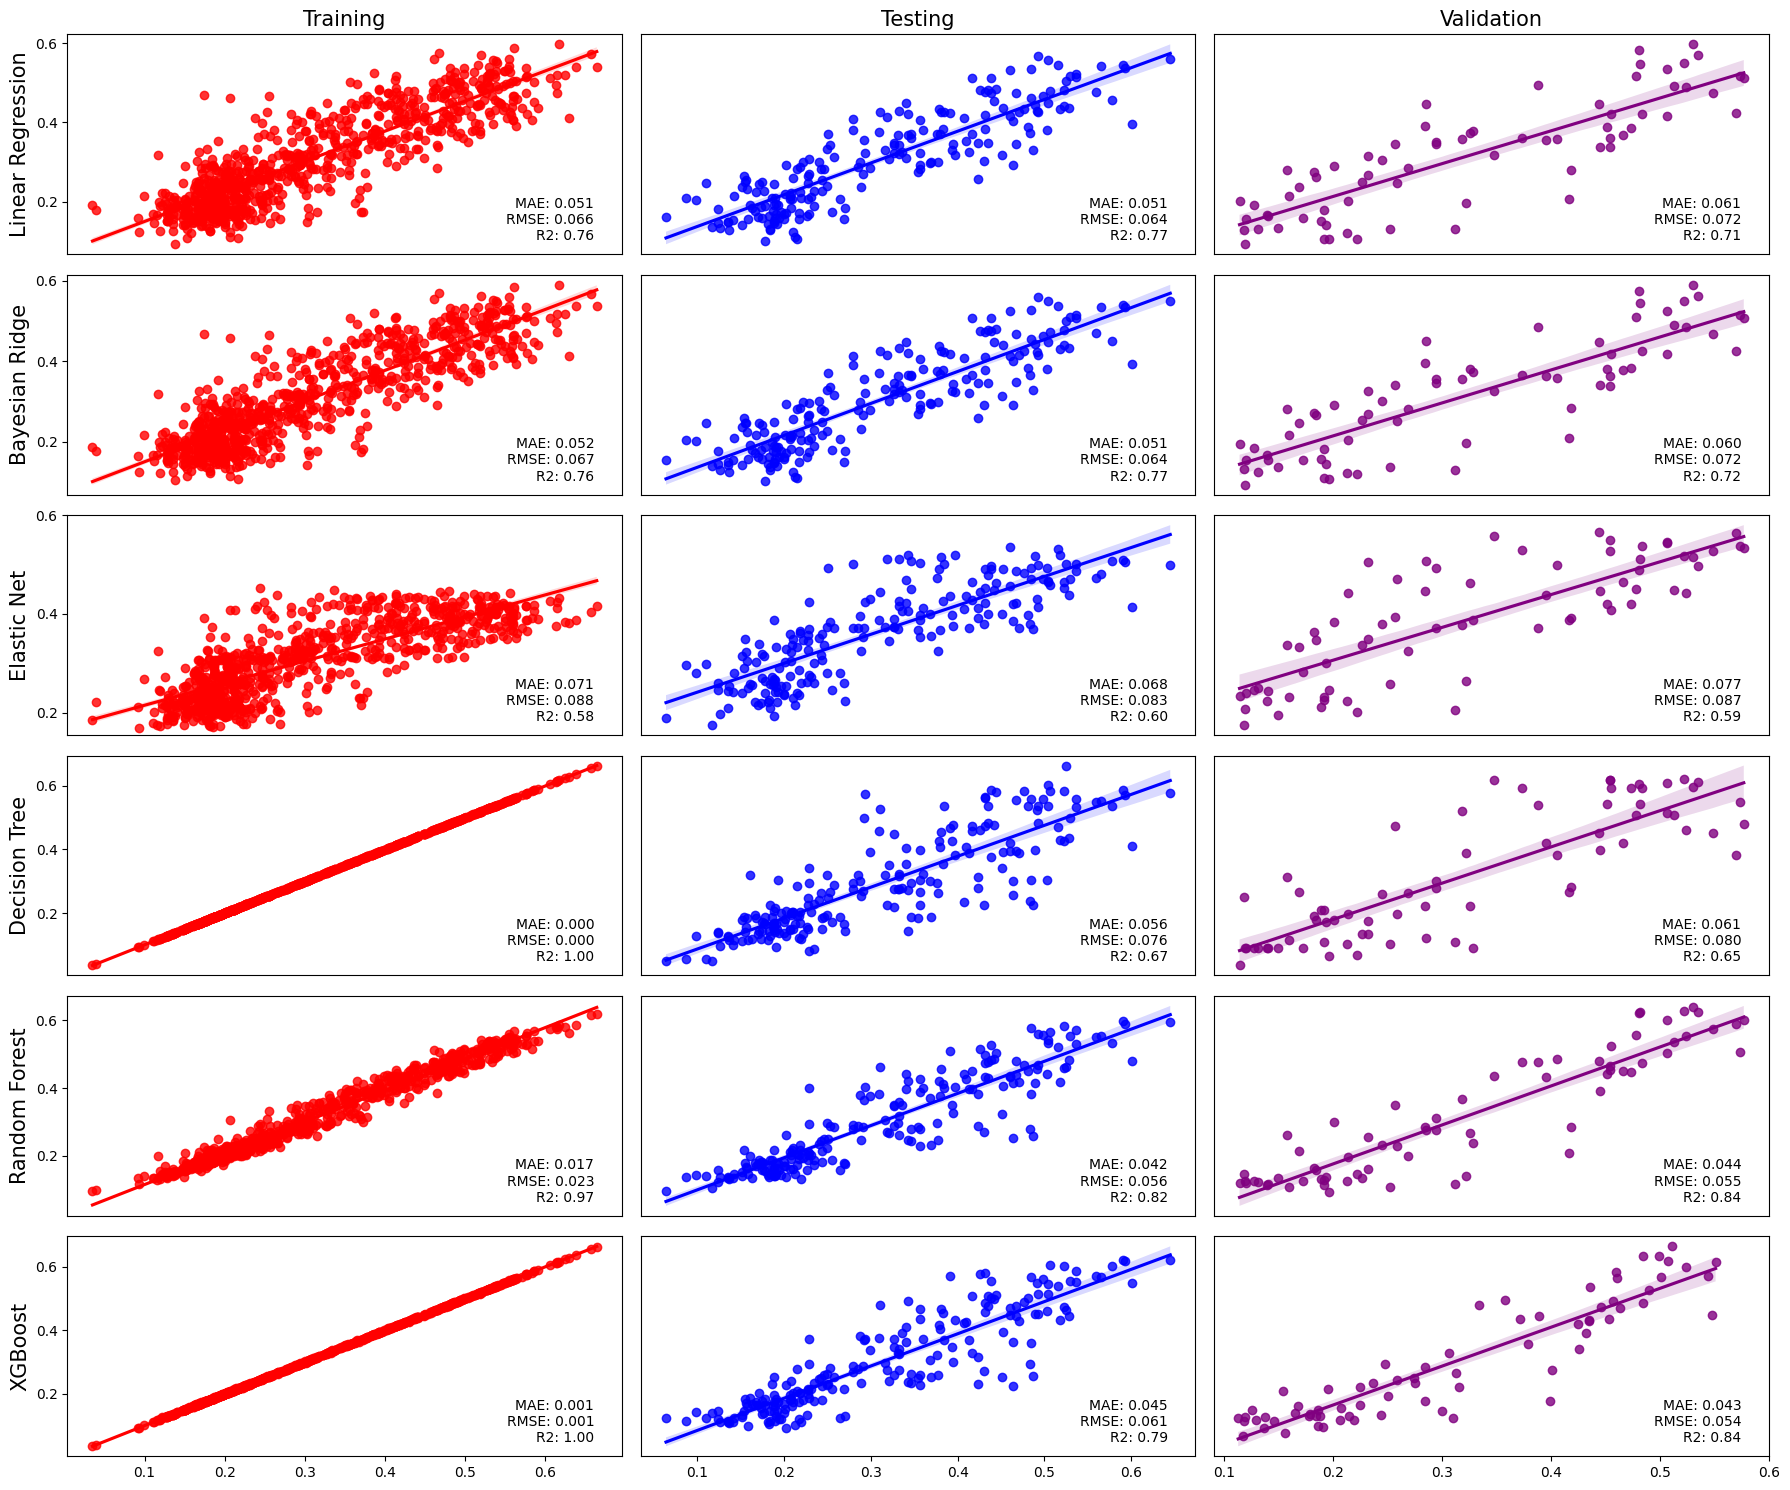

In [ ]:
# Plot 1 (Linear, Bayesian, elastic net, decision tree, random forest, XGBoost)
# 4 figures in total, non tuned EVI and LSWI, and tuned EVI and LSWI
# Create a figure with 6 rows and 3 columns
fig, axs = plt.subplots(6, 3, figsize=(18, 15))

# First column (Training)

# Linear
sns.regplot(x=actual_evi_train, y=lr_train_pred, data=df, ax=axs[0,0], color='red', line_kws={'color': 'red'}, scatter_kws={'color': 'red'})
axs[0,0].set_xlabel('')
axs[0,0].set_ylabel('Linear Regression', fontsize=15)
axs[0,0].set_title('Training')
axs[0,0].title.set_size(15)
axs[0,0].set_xticks([])
axs[0,0].set_yticks([0.2, 0.4, 0.6])

train_metrics_text_lr = f'MAE: {evi_mae_lr_train:.3f}\nRMSE: {evi_rmse_lr_train:.3f}\nR2: {evi_r2_lr_train:.2f}'
axs[0,0].text(0.95, 0.05, train_metrics_text_lr, transform=axs[0,0].transAxes, ha='right', va='bottom', fontsize=10)

# Bayesian ridge
sns.regplot(x=actual_evi_train, y=br_train_pred, data=df, ax=axs[1,0], color='red', line_kws={'color': 'red'}, scatter_kws={'color': 'red'})
axs[1,0].set_xlabel('')
axs[1,0].set_ylabel('Bayesian Ridge', fontsize=15)
#axs[1,0].set_title('Bayesian Ridge (Training)')
axs[1,0].title.set_size(15)
axs[1,0].set_xticks([])
axs[1,0].set_yticks([0.2, 0.4, 0.6])

train_metrics_text_br = f'MAE: {evi_mae_br_train:.3f}\nRMSE: {evi_rmse_br_train:.3f}\nR2: {evi_r2_br_train:.2f}'
axs[1,0].text(0.95, 0.05, train_metrics_text_br, transform=axs[1,0].transAxes, ha='right', va='bottom', fontsize=10)

# Elastic net
sns.regplot(x=actual_evi_train, y=en_train_pred, data=df, ax=axs[2,0], color='red', line_kws={'color': 'red'}, scatter_kws={'color': 'red'})
axs[2,0].set_xlabel('')
axs[2,0].set_ylabel('Elastic Net', fontsize=15)
#axs[2,0].set_title('Elastic Net (Training)')
axs[2,0].title.set_size(15)
axs[2,0].set_xticks([])
axs[2,0].set_yticks([0.2, 0.4, 0.6])

train_metrics_text_en = f'MAE: {evi_mae_en_train:.3f}\nRMSE: {evi_rmse_en_train:.3f}\nR2: {evi_r2_en_train:.2f}'
axs[2,0].text(0.95, 0.05, train_metrics_text_en, transform=axs[2,0].transAxes, ha='right', va='bottom', fontsize=10)

# Decision Tree
sns.regplot(x=actual_evi_train, y=dt_train_pred, data=df, ax=axs[3,0], color='red', line_kws={'color': 'red'}, scatter_kws={'color': 'red'})
axs[3,0].set_xlabel('')
axs[3,0].set_ylabel('Decision Tree', fontsize=15)
#axs[3,0].set_title('Decision Tree (Training)')
axs[3,0].title.set_size(15)
axs[3,0].set_xticks([])
axs[3,0].set_yticks([0.2, 0.4, 0.6])

train_metrics_text_dt = f'MAE: {evi_mae_dt_train:.3f}\nRMSE: {evi_rmse_dt_train:.3f}\nR2: {evi_r2_dt_train:.2f}'
axs[3,0].text(0.95, 0.05, train_metrics_text_dt, transform=axs[3,0].transAxes, ha='right', va='bottom', fontsize=10)

# Random forest
sns.regplot(x=actual_evi_train, y=rf_train_pred, data=df, ax=axs[4,0], color='red', line_kws={'color': 'red'}, scatter_kws={'color': 'red'})
axs[4,0].set_xlabel('')
axs[4,0].set_ylabel('Random Forest', fontsize=15)
#axs[4,0].set_title('Random Forest (Training)')
axs[4,0].title.set_size(15)
axs[4,0].set_xticks([])
axs[4,0].set_yticks([0.2, 0.4, 0.6])

train_metrics_text_rf = f'MAE: {evi_mae_rf_train:.3f}\nRMSE: {evi_rmse_rf_train:.3f}\nR2: {evi_r2_rf_train:.2f}'
axs[4,0].text(0.95, 0.05, train_metrics_text_rf, transform=axs[4,0].transAxes, ha='right', va='bottom', fontsize=10)

# XGBoost
sns.regplot(x=actual_evi_train, y=xgboost_train_pred, data=df, ax=axs[5,0], color='red', line_kws={'color': 'red'}, scatter_kws={'color': 'red'})
axs[5,0].set_xlabel('')
axs[5,0].set_ylabel('XGBoost', fontsize=15)
#axs[5,0].set_title('XGBoost (Training)')
axs[5,0].title.set_size(15)
axs[5,0].set_xticks([0.1, 0.2, 0.3, 0.4, 0.5, 0.6])
axs[5,0].set_yticks([0.2, 0.4, 0.6])

train_metrics_text_x = f'MAE: {evi_mae_x_train:.3f}\nRMSE: {evi_rmse_x_train:.3f}\nR2: {evi_r2_x_train:.2f}'
axs[5,0].text(0.95, 0.05, train_metrics_text_x, transform=axs[5,0].transAxes, ha='right', va='bottom', fontsize=10)


# Second column (Testing)

# Linear
sns.regplot(x=actual_evi_test, y=lr_test_pred, data=df, ax=axs[0,1], color='blue', line_kws={'color': 'blue'}, scatter_kws={'color': 'blue'})
axs[0,1].set_xlabel('')
#axs[0,1].set_ylabel('Predicted EVI')
axs[0,1].set_title('Testing')
axs[0,1].title.set_size(15)
axs[0,1].set_xticks([])
axs[0,1].set_yticks([])

test_metrics_text_lr = f'MAE: {evi_mae_lr_test:.3f}\nRMSE: {evi_rmse_lr_test:.3f}\nR2: {evi_r2_lr_test:.2f}'
axs[0,1].text(0.95, 0.05, test_metrics_text_lr, transform=axs[0,1].transAxes, ha='right', va='bottom', fontsize=10)

# Bayesian Ridge
sns.regplot(x=actual_evi_test, y=br_test_pred, data=df, ax=axs[1,1], color='blue', line_kws={'color': 'blue'}, scatter_kws={'color': 'blue'})
axs[1,1].set_xlabel('')
#axs[1,1].set_ylabel('Predicted EVI')
#axs[1,1].set_title('Bayesian Ridge (Testing)')
axs[1,1].title.set_size(15)
axs[1,1].set_xticks([])
axs[1,1].set_yticks([])

test_metrics_text_br = f'MAE: {evi_mae_br_test:.3f}\nRMSE: {evi_rmse_br_test:.3f}\nR2: {evi_r2_br_test:.2f}'
axs[1,1].text(0.95, 0.05, test_metrics_text_br, transform=axs[1,1].transAxes, ha='right', va='bottom', fontsize=10)

# Elastic Net
sns.regplot(x=actual_evi_test, y=en_test_pred, data=df, ax=axs[2,1], color='blue', line_kws={'color': 'blue'}, scatter_kws={'color': 'blue'})
axs[2,1].set_xlabel('')
#axs[2,1].set_ylabel('Predicted EVI')
#axs[2,1].set_title('Elastic Net (Testing)')
axs[2,1].title.set_size(15)
axs[2,1].set_xticks([])
axs[2,1].set_yticks([])

test_metrics_text_en = f'MAE: {evi_mae_en_test:.3f}\nRMSE: {evi_rmse_en_test:.3f}\nR2: {evi_r2_en_test:.2f}'
axs[2,1].text(0.95, 0.05, test_metrics_text_en, transform=axs[2,1].transAxes, ha='right', va='bottom', fontsize=10)

# Decision Tree
sns.regplot(x=actual_evi_test, y=dt_test_pred, data=df, ax=axs[3,1], color='blue', line_kws={'color': 'blue'}, scatter_kws={'color': 'blue'})
axs[3,1].set_xlabel('')
#axs[3,1].set_ylabel('Predicted EVI')
#axs[3,1].set_title('Decision Tree (Testing)')
axs[3,1].title.set_size(15)
axs[3,1].set_xticks([])
axs[3,1].set_yticks([])

test_metrics_text_dt = f'MAE: {evi_mae_dt_test:.3f}\nRMSE: {evi_rmse_dt_test:.3f}\nR2: {evi_r2_dt_test:.2f}'
axs[3,1].text(0.95, 0.05, test_metrics_text_dt, transform=axs[3,1].transAxes, ha='right', va='bottom', fontsize=10)

# Random Forest
sns.regplot(x=actual_evi_test, y=rf_test_pred, data=df, ax=axs[4,1], color='blue', line_kws={'color': 'blue'}, scatter_kws={'color': 'blue'})
axs[4,1].set_xlabel('')
#axs[4,1].set_ylabel('Predicted EVI')
#axs[4,1].set_title('Random Forest (Testing)')
axs[4,1].title.set_size(15)
axs[4,1].set_xticks([])
axs[4,1].set_yticks([])

test_metrics_text_rf = f'MAE: {evi_mae_rf_test:.3f}\nRMSE: {evi_rmse_rf_test:.3f}\nR2: {evi_r2_rf_test:.2f}'
axs[4,1].text(0.95, 0.05, test_metrics_text_rf, transform=axs[4,1].transAxes, ha='right', va='bottom', fontsize=10)

# XGBoost
sns.regplot(x=actual_evi_test, y=xgboost_test_pred, data=df, ax=axs[5,1], color='blue', line_kws={'color': 'blue'}, scatter_kws={'color': 'blue'})
axs[5,1].set_xlabel('')
#axs[5,1].set_ylabel('Predicted EVI')
#axs[5,1].set_title('XGBoost (Testing)')
axs[5,1].title.set_size(15)
axs[5,1].set_xticks([0.1, 0.2, 0.3, 0.4, 0.5, 0.6])
axs[5,1].set_yticks([])

test_metrics_text_x = f'MAE: {evi_mae_x_test:.3f}\nRMSE: {evi_rmse_x_test:.3f}\nR2: {evi_r2_x_test:.2f}'
axs[5,1].text(0.95, 0.05, test_metrics_text_x, transform=axs[5,1].transAxes, ha='right', va='bottom', fontsize=10)


# 3rd column (Validation)

# Linear
sns.regplot(x=actual_evi_val, y=lr_val_pred, data=df, ax=axs[0,2], color='purple', line_kws={'color': 'purple'}, scatter_kws={'color': 'purple'})
axs[0,2].set_xlabel('')
#axs[0,2].set_ylabel('Predicted EVI')
axs[0,2].set_title('Validation')
axs[0,2].title.set_size(15)
axs[0,2].set_xticks([])
axs[0,2].set_yticks([])

val_metrics_text_lr = f'MAE: {evi_mae_lr_val:.3f}\nRMSE: {evi_rmse_lr_val:.3f}\nR2: {evi_r2_lr_val:.2f}'
axs[0,2].text(0.95, 0.05, val_metrics_text_lr, transform=axs[0,2].transAxes, ha='right', va='bottom', fontsize=10)

# Bayesian Ridge
sns.regplot(x=actual_evi_val, y=br_val_pred, data=df, ax=axs[1,2], color='purple', line_kws={'color': 'purple'}, scatter_kws={'color': 'purple'})
axs[1,2].set_xlabel('')
#axs[1,2].set_ylabel('Predicted EVI')
#axs[1,2].set_title('Bayesian Ridge (Validation)')
axs[1,2].title.set_size(15)
axs[1,2].set_xticks([])
axs[1,2].set_yticks([])

val_metrics_text_br = f'MAE: {evi_mae_br_val:.3f}\nRMSE: {evi_rmse_br_val:.3f}\nR2: {evi_r2_br_val:.2f}'
axs[1,2].text(0.95, 0.05, val_metrics_text_br, transform=axs[1,2].transAxes, ha='right', va='bottom', fontsize=10)

# Elastic Net
sns.regplot(x=actual_evi_val, y=en_val_pred, data=df, ax=axs[2,2], color='purple', line_kws={'color': 'purple'}, scatter_kws={'color': 'purple'})
axs[2,2].set_xlabel('')
#axs[2,2].set_ylabel('Predicted EVI')
#axs[2,2].set_title('Elastic Net (Validation)')
axs[2,2].title.set_size(15)
axs[2,2].set_xticks([])
axs[2,2].set_yticks([])

val_metrics_text_en = f'MAE: {evi_mae_en_val:.3f}\nRMSE: {evi_rmse_en_val:.3f}\nR2: {evi_r2_en_val:.2f}'
axs[2,2].text(0.95, 0.05, val_metrics_text_en, transform=axs[2,2].transAxes, ha='right', va='bottom', fontsize=10)

# Decision Tree
sns.regplot(x=actual_evi_val, y=dt_val_pred, data=df, ax=axs[3,2], color='purple', line_kws={'color': 'purple'}, scatter_kws={'color': 'purple'})
axs[3,2].set_xlabel('')
#axs[3,2].set_ylabel('Predicted EVI')
#axs[3,2].set_title('Decision Tree (Validation)')
axs[3,2].title.set_size(15)
axs[3,2].set_xticks([])
axs[3,2].set_yticks([])

val_metrics_text_dt = f'MAE: {evi_mae_dt_val:.3f}\nRMSE: {evi_rmse_dt_val:.3f}\nR2: {evi_r2_dt_val:.2f}'
axs[3,2].text(0.95, 0.05, val_metrics_text_dt, transform=axs[3,2].transAxes, ha='right', va='bottom', fontsize=10)

# Random Forest
sns.regplot(x=actual_evi_val, y=rf_val_pred, data=df, ax=axs[4,2], color='purple', line_kws={'color': 'purple'}, scatter_kws={'color': 'purple'})
axs[4,2].set_xlabel('')
#axs[4,2].set_ylabel('Predicted EVI')
#axs[4,2].set_title('Random Forest (Validation)')
axs[4,2].title.set_size(15)
axs[4,2].set_xticks([])
axs[4,2].set_yticks([])

val_metrics_text_rf = f'MAE: {evi_mae_rf_val:.3f}\nRMSE: {evi_rmse_rf_val:.3f}\nR2: {evi_r2_rf_val:.2f}'
axs[4,2].text(0.95, 0.05, val_metrics_text_rf, transform=axs[4,2].transAxes, ha='right', va='bottom', fontsize=10)

# XGBoost
sns.regplot(x=actual_evi_val, y=xgboost_val_pred, data=df, ax=axs[5,2], color='purple', line_kws={'color': 'purple'}, scatter_kws={'color': 'purple'})
axs[5,2].set_xlabel('')
#axs[5,2].set_ylabel('Predicted EVI')
#axs[5,2].set_title('XGBoost (Validation)')
axs[5,2].title.set_size(15)
axs[5,2].set_xticks([0.1, 0.2, 0.3, 0.4, 0.5, 0.6])
axs[5,2].set_yticks([])

val_metrics_text_x = f'MAE: {evi_mae_x_val:.3f}\nRMSE: {evi_rmse_x_val:.3f}\nR2: {evi_r2_x_val:.2f}'
axs[5,2].text(0.95, 0.05, val_metrics_text_x, transform=axs[5,2].transAxes, ha='right', va='bottom', fontsize=10)
plt.tight_layout()

# Save the figure as an image file (e.g., PNG)
models_base_path = 'Modeling VIs in Tallgrass/models/evi/'
plt.savefig(models_base_path + 'EVI_without_tuning_1.png')

# Display a message indicating the file has been saved
print("Figure saved as 'EVI_without_tuning_1.png'")

plt.show()

Figure saved as 'EVI_without_tuning_2.png'


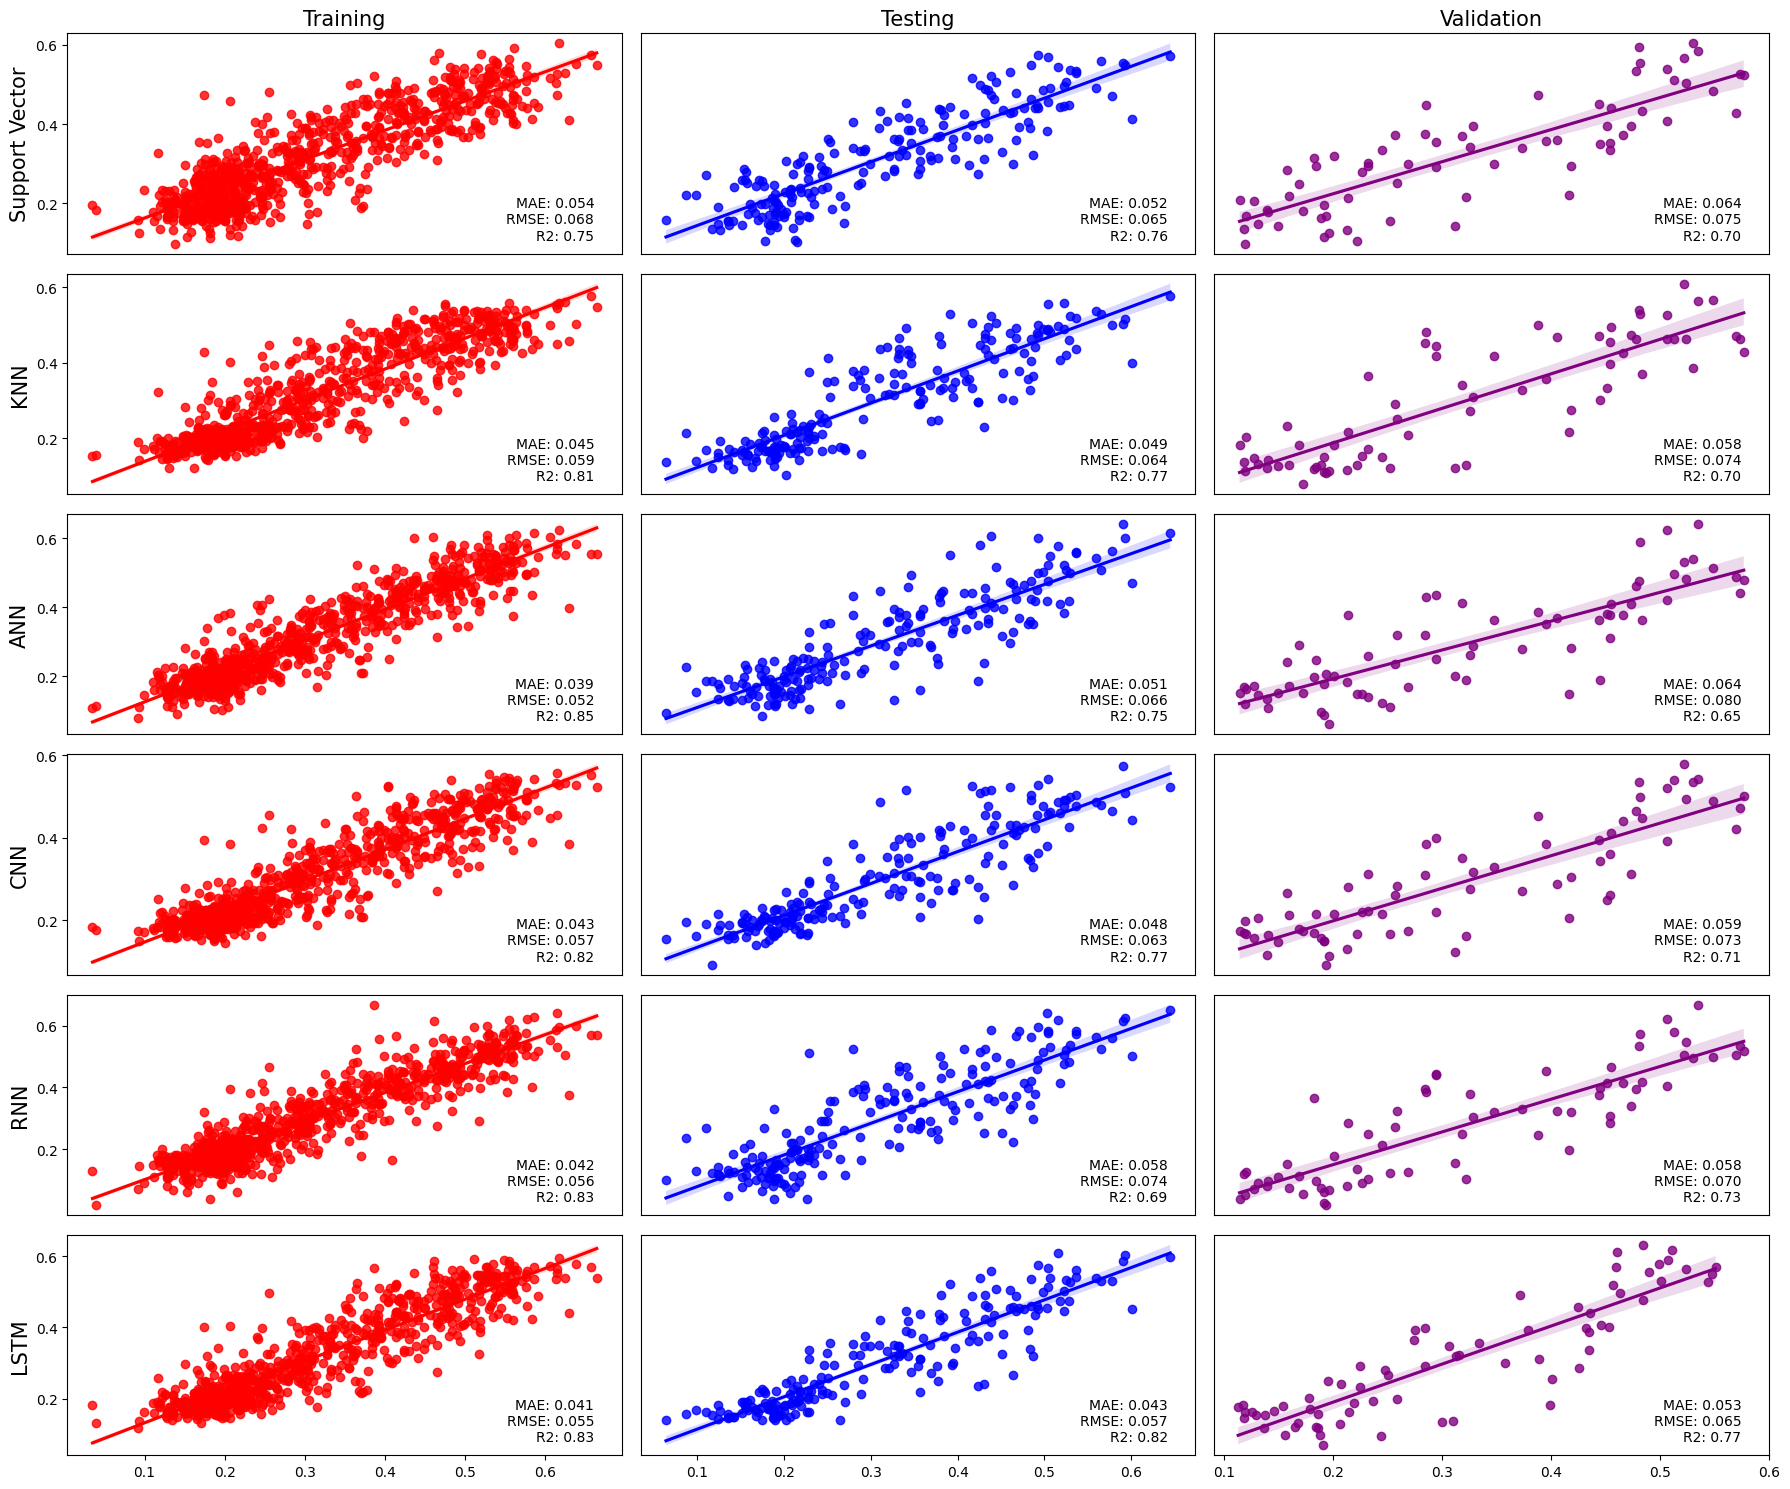

In [ ]:
# Plot 2 (SVR, KNN, ANN, CNN, RNN, LSTM)
# Create a figure with 6 rows and 3 columns
fig, axs = plt.subplots(6, 3, figsize=(18, 15))

# First column (Training)

# SVR
sns.regplot(x=actual_evi_train, y=svr_train_pred, data=df, ax=axs[0,0], color='red', line_kws={'color': 'red'}, scatter_kws={'color': 'red'})
axs[0,0].set_xlabel('')
axs[0,0].set_ylabel('Support Vector', fontsize=15)
axs[0,0].set_title('Training')
axs[0,0].title.set_size(15)
axs[0,0].set_xticks([])
axs[0,0].set_yticks([0.2, 0.4, 0.6])


train_metrics_text_svr = f'MAE: {evi_mae_svr_train:.3f}\nRMSE: {evi_rmse_svr_train:.3f}\nR2: {evi_r2_svr_train:.2f}'
axs[0,0].text(0.95, 0.05, train_metrics_text_svr, transform=axs[0,0].transAxes, ha='right', va='bottom', fontsize=10)

# KNN
sns.regplot(x=actual_evi_train, y=knn_train_pred, data=df, ax=axs[1,0], color='red', line_kws={'color': 'red'}, scatter_kws={'color': 'red'})
axs[1,0].set_xlabel('')
axs[1,0].set_ylabel('KNN', fontsize=15)
#axs[1,0].set_title('KNN (Training)')
axs[1,0].title.set_size(15)
axs[1,0].set_xticks([])
axs[1,0].set_yticks([0.2, 0.4, 0.6])

train_metrics_text_knn = f'MAE: {evi_mae_knn_train:.3f}\nRMSE: {evi_rmse_knn_train:.3f}\nR2: {evi_r2_knn_train:.2f}'
axs[1,0].text(0.95, 0.05, train_metrics_text_knn, transform=axs[1,0].transAxes, ha='right', va='bottom', fontsize=10)

# ANN
sns.regplot(x=actual_evi_train, y=ann_train_pred, data=df, ax=axs[2,0], color='red', line_kws={'color': 'red'}, scatter_kws={'color': 'red'})
axs[2,0].set_xlabel('')
axs[2,0].set_ylabel('ANN', fontsize=15)
#axs[2,0].set_title('ANN (Training)')
axs[2,0].title.set_size(15)
axs[2,0].set_xticks([])
axs[2,0].set_yticks([0.2, 0.4, 0.6])

train_metrics_text_ann = f'MAE: {evi_mae_ann_train:.3f}\nRMSE: {evi_rmse_ann_train:.3f}\nR2: {evi_r2_ann_train:.2f}'
axs[2,0].text(0.95, 0.05, train_metrics_text_ann, transform=axs[2,0].transAxes, ha='right', va='bottom', fontsize=10)

# CNN
sns.regplot(x=actual_evi_train, y=cnn_train_pred, data=df, ax=axs[3,0], color='red', line_kws={'color': 'red'}, scatter_kws={'color': 'red'})
axs[3,0].set_xlabel('')
axs[3,0].set_ylabel('CNN', fontsize=15)
#axs[3,0].set_title('CNN (Training)')
axs[3,0].title.set_size(15)
axs[3,0].set_xticks([])
axs[3,0].set_yticks([0.2, 0.4, 0.6])

train_metrics_text_cnn = f'MAE: {evi_mae_cnn_train:.3f}\nRMSE: {evi_rmse_cnn_train:.3f}\nR2: {evi_r2_cnn_train:.2f}'
axs[3,0].text(0.95, 0.05, train_metrics_text_cnn, transform=axs[3,0].transAxes, ha='right', va='bottom', fontsize=10)

# RNN
sns.regplot(x=actual_evi_train, y=rnn_train_pred, data=df, ax=axs[4,0], color='red', line_kws={'color': 'red'}, scatter_kws={'color': 'red'})
axs[4,0].set_xlabel('')
axs[4,0].set_ylabel('RNN', fontsize=15)
#axs[4,0].set_title('RNN (Training)')
axs[4,0].title.set_size(15)
axs[4,0].set_xticks([])
axs[4,0].set_yticks([0.2, 0.4, 0.6])

train_metrics_text_rnn = f'MAE: {evi_mae_rnn_train:.3f}\nRMSE: {evi_rmse_rnn_train:.3f}\nR2: {evi_r2_rnn_train:.2f}'
axs[4,0].text(0.95, 0.05, train_metrics_text_rnn, transform=axs[4,0].transAxes, ha='right', va='bottom', fontsize=10)

# LSTM
sns.regplot(x=actual_evi_train, y=lstm_train_pred, data=df, ax=axs[5,0], color='red', line_kws={'color': 'red'}, scatter_kws={'color': 'red'})
axs[5,0].set_xlabel('')
axs[5,0].set_ylabel('LSTM', fontsize=15)
#axs[5,0].set_title('LSTM (Training)')
axs[5,0].title.set_size(15)
axs[5,0].set_xticks([0.1, 0.2, 0.3, 0.4, 0.5, 0.6])
axs[5,0].set_yticks([0.2, 0.4, 0.6])

train_metrics_text_lstm = f'MAE: {evi_mae_lstm_train:.3f}\nRMSE: {evi_rmse_lstm_train:.3f}\nR2: {evi_r2_lstm_train:.2f}'
axs[5,0].text(0.95, 0.05, train_metrics_text_lstm, transform=axs[5,0].transAxes, ha='right', va='bottom', fontsize=10)


# Second column (Testing)

# SVR
sns.regplot(x=actual_evi_test, y=svr_test_pred, data=df, ax=axs[0,1], color='blue', line_kws={'color': 'blue'}, scatter_kws={'color': 'blue'})
axs[0,1].set_xlabel('')
#axs[0,1].set_ylabel('Predicted EVI')
axs[0,1].set_title('Testing')
axs[0,1].title.set_size(15)
axs[0,1].set_xticks([])
axs[0,1].set_yticks([])

test_metrics_text_svr = f'MAE: {evi_mae_svr_test:.3f}\nRMSE: {evi_rmse_svr_test:.3f}\nR2: {evi_r2_svr_test:.2f}'
axs[0,1].text(0.95, 0.05, test_metrics_text_svr, transform=axs[0,1].transAxes, ha='right', va='bottom', fontsize=10)

# KNN
sns.regplot(x=actual_evi_test, y=knn_test_pred, data=df, ax=axs[1,1], color='blue', line_kws={'color': 'blue'}, scatter_kws={'color': 'blue'})
axs[1,1].set_xlabel('')
#axs[1,1].set_ylabel('Predicted EVI')
#axs[1,1].set_title('KNN (Testing)')
axs[1,1].title.set_size(15)
axs[1,1].set_xticks([])
axs[1,1].set_yticks([])

test_metrics_text_knn = f'MAE: {evi_mae_knn_test:.3f}\nRMSE: {evi_rmse_knn_test:.3f}\nR2: {evi_r2_knn_test:.2f}'
axs[1,1].text(0.95, 0.05, test_metrics_text_knn, transform=axs[1,1].transAxes, ha='right', va='bottom', fontsize=10)

# ANN
sns.regplot(x=actual_evi_test, y=ann_test_pred, data=df, ax=axs[2,1], color='blue', line_kws={'color': 'blue'}, scatter_kws={'color': 'blue'})
axs[2,1].set_xlabel('')
#axs[2,1].set_ylabel('Predicted EVI')
#axs[2,1].set_title('ANN (Testing)')
axs[2,1].title.set_size(15)
axs[2,1].set_xticks([])
axs[2,1].set_yticks([])

test_metrics_text_ann = f'MAE: {evi_mae_ann_test:.3f}\nRMSE: {evi_rmse_ann_test:.3f}\nR2: {evi_r2_ann_test:.2f}'
axs[2,1].text(0.95, 0.05, test_metrics_text_ann, transform=axs[2,1].transAxes, ha='right', va='bottom', fontsize=10)

# CNN
sns.regplot(x=actual_evi_test, y=cnn_test_pred, data=df, ax=axs[3,1], color='blue', line_kws={'color': 'blue'}, scatter_kws={'color': 'blue'})
axs[3,1].set_xlabel('')
#axs[3,1].set_ylabel('Predicted EVI')
#axs[3,1].set_title('CNN (Testing)')
axs[3,1].title.set_size(15)
axs[3,1].set_xticks([])
axs[3,1].set_yticks([])

test_metrics_text_cnn = f'MAE: {evi_mae_cnn_test:.3f}\nRMSE: {evi_rmse_cnn_test:.3f}\nR2: {evi_r2_cnn_test:.2f}'
axs[3,1].text(0.95, 0.05, test_metrics_text_cnn, transform=axs[3,1].transAxes, ha='right', va='bottom', fontsize=10)

# RNN
sns.regplot(x=actual_evi_test, y=rnn_test_pred, data=df, ax=axs[4,1], color='blue', line_kws={'color': 'blue'}, scatter_kws={'color': 'blue'})
axs[4,1].set_xlabel('')
#axs[4,1].set_ylabel('Predicted EVI')
#axs[4,1].set_title('RNN (Testing)')
axs[4,1].title.set_size(15)
axs[4,1].set_xticks([])
axs[4,1].set_yticks([])

test_metrics_text_rnn = f'MAE: {evi_mae_rnn_test:.3f}\nRMSE: {evi_rmse_rnn_test:.3f}\nR2: {evi_r2_rnn_test:.2f}'
axs[4,1].text(0.95, 0.05, test_metrics_text_rnn, transform=axs[4,1].transAxes, ha='right', va='bottom', fontsize=10)

# LSTM
sns.regplot(x=actual_evi_test, y=lstm_test_pred, data=df, ax=axs[5,1], color='blue', line_kws={'color': 'blue'}, scatter_kws={'color': 'blue'})
axs[5,1].set_xlabel('')
#axs[5,1].set_ylabel('Predicted EVI')
#axs[5,1].set_title('LSTM (Testing)')
axs[5,1].title.set_size(15)
axs[5,1].set_xticks([0.1, 0.2, 0.3, 0.4, 0.5, 0.6])
axs[5,1].set_yticks([])

test_metrics_text_lstm = f'MAE: {evi_mae_lstm_test:.3f}\nRMSE: {evi_rmse_lstm_test:.3f}\nR2: {evi_r2_lstm_test:.2f}'
axs[5,1].text(0.95, 0.05, test_metrics_text_lstm, transform=axs[5,1].transAxes, ha='right', va='bottom', fontsize=10)


# 3rd column (Validation)

# SVR
sns.regplot(x=actual_evi_val, y=svr_val_pred, data=df, ax=axs[0,2], color='purple', line_kws={'color': 'purple'}, scatter_kws={'color': 'purple'})
axs[0,2].set_xlabel('')
#axs[0,2].set_ylabel('Predicted EVI')
axs[0,2].set_title('Validation')
axs[0,2].title.set_size(15)
axs[0,2].set_xticks([])
axs[0,2].set_yticks([])

val_metrics_text_svr = f'MAE: {evi_mae_svr_val:.3f}\nRMSE: {evi_rmse_svr_val:.3f}\nR2: {evi_r2_svr_val:.2f}'
axs[0,2].text(0.95, 0.05, val_metrics_text_svr, transform=axs[0,2].transAxes, ha='right', va='bottom', fontsize=10)

# KNN
sns.regplot(x=actual_evi_val, y=knn_val_pred, data=df, ax=axs[1,2], color='purple', line_kws={'color': 'purple'}, scatter_kws={'color': 'purple'})
axs[1,2].set_xlabel('')
#axs[1,2].set_ylabel('Predicted EVI')
#axs[1,2].set_title('KNN (Validation)')
axs[1,2].title.set_size(15)
axs[1,2].set_xticks([])
axs[1,2].set_yticks([])

val_metrics_text_knn = f'MAE: {evi_mae_knn_val:.3f}\nRMSE: {evi_rmse_knn_val:.3f}\nR2: {evi_r2_knn_val:.2f}'
axs[1,2].text(0.95, 0.05, val_metrics_text_knn, transform=axs[1,2].transAxes, ha='right', va='bottom', fontsize=10)

# ANN
sns.regplot(x=actual_evi_val, y=ann_val_pred, data=df, ax=axs[2,2], color='purple', line_kws={'color': 'purple'}, scatter_kws={'color': 'purple'})
axs[2,2].set_xlabel('')
#axs[2,2].set_ylabel('Predicted EVI')
#axs[2,2].set_title('ANN (Validation)')
axs[2,2].title.set_size(15)
axs[2,2].set_xticks([])
axs[2,2].set_yticks([])

val_metrics_text_ann = f'MAE: {evi_mae_ann_val:.3f}\nRMSE: {evi_rmse_ann_val:.3f}\nR2: {evi_r2_ann_val:.2f}'
axs[2,2].text(0.95, 0.05, val_metrics_text_ann, transform=axs[2,2].transAxes, ha='right', va='bottom', fontsize=10)

# CNN
sns.regplot(x=actual_evi_val, y=cnn_val_pred, data=df, ax=axs[3,2], color='purple', line_kws={'color': 'purple'}, scatter_kws={'color': 'purple'})
axs[3,2].set_xlabel('')
#axs[3,2].set_ylabel('Predicted EVI')
#axs[3,2].set_title('CNN (Validation)')
axs[3,2].title.set_size(15)
axs[3,2].set_xticks([])
axs[3,2].set_yticks([])

val_metrics_text_cnn = f'MAE: {evi_mae_cnn_val:.3f}\nRMSE: {evi_rmse_cnn_val:.3f}\nR2: {evi_r2_cnn_val:.2f}'
axs[3,2].text(0.95, 0.05, val_metrics_text_cnn, transform=axs[3,2].transAxes, ha='right', va='bottom', fontsize=10)

# RNN
sns.regplot(x=actual_evi_val, y=rnn_val_pred, data=df, ax=axs[4,2], color='purple', line_kws={'color': 'purple'}, scatter_kws={'color': 'purple'})
axs[4,2].set_xlabel('')
#axs[4,2].set_ylabel('Predicted EVI')
#axs[4,2].set_title('RNN (Validation)')
axs[4,2].title.set_size(15)
axs[4,2].set_xticks([])
axs[4,2].set_yticks([])

val_metrics_text_rnn = f'MAE: {evi_mae_rnn_val:.3f}\nRMSE: {evi_rmse_rnn_val:.3f}\nR2: {evi_r2_rnn_val:.2f}'
axs[4,2].text(0.95, 0.05, val_metrics_text_rnn, transform=axs[4,2].transAxes, ha='right', va='bottom', fontsize=10)

# LSTM
sns.regplot(x=actual_evi_val, y=lstm_val_pred, data=df, ax=axs[5,2], color='purple', line_kws={'color': 'purple'}, scatter_kws={'color': 'purple'})
axs[5,2].set_xlabel('')
#axs[5,2].set_ylabel('Predicted EVI')
#axs[5,2].set_title('LSTM (Validation)')
axs[5,2].title.set_size(15)
axs[5,2].set_xticks([0.1, 0.2, 0.3, 0.4, 0.5, 0.6])
axs[5,2].set_yticks([])

val_metrics_text_lstm = f'MAE: {evi_mae_lstm_val:.3f}\nRMSE: {evi_rmse_lstm_val:.3f}\nR2: {evi_r2_lstm_val:.2f}'
axs[5,2].text(0.95, 0.05, val_metrics_text_lstm, transform=axs[5,2].transAxes, ha='right', va='bottom', fontsize=10)
plt.tight_layout()

# Save the figure as an image file (e.g., PNG)
models_base_path = 'Modeling VIs in Tallgrass/models/evi/'
plt.savefig(models_base_path + 'EVI_without_tuning_2.png')

# Display a message indicating the file has been saved
print("Figure saved as 'EVI_without_tuning_2.png'")

plt.show()

### EVI - Tuning

In [ ]:
# Plot 1 (Linear, Bayesian, elastic net, decision tree, random forest, XGBoost)
# EVI with tuning (6x3)
fig, axs = plt.subplots(6, 3, figsize=(70, 65))

# First column (Training EVI)

# Linear
sns.regplot(x=actual_evi_train, y=lr_tuned_train_pred, data=df, ax=axs[0,0], color='red', line_kws={'color': 'red'}, scatter_kws={'color': 'red'})
axs[0,0].set_xlabel('')
axs[0,0].set_ylabel('Linear Regression', fontsize=70)
axs[0,0].set_title('Training')
axs[0,0].title.set_size(70)
axs[0,0].set_xticks([])
axs[0,0].set_yticks([0.2, 0.4, 0.6])
axs[0,0].tick_params(axis='y', labelsize=60)

train_metrics_text_lr = f'MAE: {evi_mae_lr_tuned_train:.3f}\nRMSE: {evi_rmse_lr_tuned_train:.3f}\nR2: {evi_r2_lr_tuned_train:.2f}'
axs[0,0].text(0.95, 0.05, train_metrics_text_lr, transform=axs[0,0].transAxes, ha='right', va='bottom', fontsize=60)

# Bayesian Ridge
sns.regplot(x=actual_evi_train, y=br_tuned_train_pred, data=df, ax=axs[1,0], color='red', line_kws={'color': 'red'}, scatter_kws={'color': 'red'})
axs[1,0].set_xlabel('')
axs[1,0].set_ylabel('Bayesian Ridge', fontsize=70)
#axs[1,0].set_title('Bayesian Ridge (Training)')
axs[1,0].title.set_size(70)
axs[1,0].set_xticks([])
axs[1,0].set_yticks([0.2, 0.4, 0.6])
axs[1,0].tick_params(axis='y', labelsize=60)

train_metrics_text_br = f'MAE: {evi_mae_br_tuned_train:.3f}\nRMSE: {evi_rmse_br_tuned_train:.3f}\nR2: {evi_r2_br_tuned_train:.2f}'
axs[1,0].text(0.95, 0.05, train_metrics_text_br, transform=axs[1,0].transAxes, ha='right', va='bottom', fontsize=60)

# Elastic Net
sns.regplot(x=actual_evi_train, y=en_tuned_train_pred, data=df, ax=axs[2,0], color='red', line_kws={'color': 'red'}, scatter_kws={'color': 'red'})
axs[2,0].set_xlabel('')
axs[2,0].set_ylabel('Elastic Net', fontsize=70)
#axs[2,0].set_title('Elastic Net (Training)')
axs[2,0].title.set_size(70)
axs[2,0].set_xticks([])
axs[2,0].set_yticks([0.2, 0.4, 0.6])
axs[2,0].tick_params(axis='y', labelsize=60)

train_metrics_text_en = f'MAE: {evi_mae_en_tuned_train:.3f}\nRMSE: {evi_rmse_en_tuned_train:.3f}\nR2: {evi_r2_en_tuned_train:.2f}'
axs[2,0].text(0.95, 0.05, train_metrics_text_en, transform=axs[2,0].transAxes, ha='right', va='bottom', fontsize=60)

# Decision Tree *
sns.regplot(x=actual_evi_train, y=dt_train_pred, data=df, ax=axs[3,0], color='red', line_kws={'color': 'red'}, scatter_kws={'color': 'red'})
axs[3,0].set_xlabel('')
axs[3,0].set_ylabel('Decision Tree*', fontsize=70)
#axs[3,0].set_title('Decision Tree (Training)*')
axs[3,0].title.set_size(70)
axs[3,0].set_xticks([])
axs[3,0].set_yticks([0.2, 0.4, 0.6])
axs[3,0].tick_params(axis='y', labelsize=60)

train_metrics_text_dt = f'MAE: {evi_mae_dt_train:.3f}\nRMSE: {evi_rmse_dt_train:.3f}\nR2: {evi_r2_dt_train:.2f}'
axs[3,0].text(0.95, 0.05, train_metrics_text_dt, transform=axs[3,0].transAxes, ha='right', va='bottom', fontsize=60)

# Random Forest
sns.regplot(x=actual_evi_train, y=rf_tuned_train_pred, data=df, ax=axs[4,0], color='red', line_kws={'color': 'red'}, scatter_kws={'color': 'red'})
axs[4,0].set_xlabel('')
axs[4,0].set_ylabel('Random Forest', fontsize=70)
#axs[4,0].set_title('Random Forest (Training)')
axs[4,0].title.set_size(70)
axs[4,0].set_xticks([])
axs[4,0].set_yticks([0.2, 0.4, 0.6])
axs[4,0].tick_params(axis='y', labelsize=60)

train_metrics_text_rf = f'MAE: {evi_mae_rf_tuned_train:.3f}\nRMSE: {evi_rmse_rf_tuned_train:.3f}\nR2: {evi_r2_rf_tuned_train:.2f}'
axs[4,0].text(0.95, 0.05, train_metrics_text_rf, transform=axs[4,0].transAxes, ha='right', va='bottom', fontsize=60)

# XGBoost
sns.regplot(x=actual_evi_train, y=xgboost_tuned_train_pred, data=df, ax=axs[5,0], color='red', line_kws={'color': 'red'}, scatter_kws={'color': 'red'})
axs[5,0].set_xlabel('')
axs[5,0].set_ylabel('XGBoost', fontsize=70)
#axs[5,0].set_title('XGBoost (Training)')
axs[5,0].title.set_size(70)
axs[5,0].set_xticks([0.1, 0.2, 0.3, 0.4, 0.5, 0.6])
axs[5,0].set_yticks([0.2, 0.4, 0.6])
axs[5,0].tick_params(axis='x', labelsize=60)
axs[5,0].tick_params(axis='y', labelsize=60)

train_metrics_text_x = f'MAE: {evi_mae_x_tuned_train:.3f}\nRMSE: {evi_rmse_x_tuned_train:.3f}\nR2: {evi_r2_x_tuned_train:.2f}'
axs[5,0].text(0.95, 0.05, train_metrics_text_x, transform=axs[5,0].transAxes, ha='right', va='bottom', fontsize=60)


# Second column (Testing EVI)

# Linear
sns.regplot(x=actual_evi_test, y=lr_tuned_test_pred, data=df, ax=axs[0,1], color='blue', line_kws={'color': 'blue'}, scatter_kws={'color': 'blue'})
axs[0,1].set_xlabel('')
#axs[0,1].set_ylabel('Predicted EVI')
axs[0,1].set_title('Testing')
axs[0,1].title.set_size(70)
axs[0,1].set_xticks([])
axs[0,1].set_yticks([])

test_metrics_text_lr = f'MAE: {evi_mae_lr_tuned_test:.3f}\nRMSE: {evi_rmse_lr_tuned_test:.3f}\nR2: {evi_r2_lr_tuned_test:.2f}'
axs[0,1].text(0.95, 0.05, test_metrics_text_lr, transform=axs[0,1].transAxes, ha='right', va='bottom', fontsize=60)

# Bayesian Ridge
sns.regplot(x=actual_evi_test, y=br_tuned_test_pred, data=df, ax=axs[1,1], color='blue', line_kws={'color': 'blue'}, scatter_kws={'color': 'blue'})
axs[1,1].set_xlabel('')
#axs[1,1].set_ylabel('Predicted EVI')
#axs[1,1].set_title('Bayesian Ridge (Testing)')
axs[1,1].title.set_size(70)
axs[1,1].set_xticks([])
axs[1,1].set_yticks([])

test_metrics_text_br = f'MAE: {evi_mae_br_tuned_test:.3f}\nRMSE: {evi_rmse_br_tuned_test:.3f}\nR2: {evi_r2_br_tuned_test:.2f}'
axs[1,1].text(0.95, 0.05, test_metrics_text_br, transform=axs[1,1].transAxes, ha='right', va='bottom', fontsize=60)

# Elastic Net
sns.regplot(x=actual_evi_test, y=en_tuned_test_pred, data=df, ax=axs[2,1], color='blue', line_kws={'color': 'blue'}, scatter_kws={'color': 'blue'})
axs[2,1].set_xlabel('')
#axs[2,1].set_ylabel('Predicted EVI')
#axs[2,1].set_title('Elastic Net (Testing)')
axs[2,1].title.set_size(70)
axs[2,1].set_xticks([])
axs[2,1].set_yticks([])

test_metrics_text_en = f'MAE: {evi_mae_en_tuned_test:.3f}\nRMSE: {evi_rmse_en_tuned_test:.3f}\nR2: {evi_r2_en_tuned_test:.2f}'
axs[2,1].text(0.95, 0.05, test_metrics_text_en, transform=axs[2,1].transAxes, ha='right', va='bottom', fontsize=60)

# Decision Tree *
sns.regplot(x=actual_evi_test, y=dt_test_pred, data=df, ax=axs[3,1], color='blue', line_kws={'color': 'blue'}, scatter_kws={'color': 'blue'})
axs[3,1].set_xlabel('')
#axs[3,1].set_ylabel('Predicted EVI')
#axs[3,1].set_title('Decision Tree (Testing)*')
axs[3,1].title.set_size(70)
axs[3,1].set_xticks([])
axs[3,1].set_yticks([])

test_metrics_text_dt = f'MAE: {evi_mae_dt_test:.3f}\nRMSE: {evi_rmse_dt_test:.3f}\nR2: {evi_r2_dt_test:.2f}'
axs[3,1].text(0.95, 0.05, test_metrics_text_dt, transform=axs[3,1].transAxes, ha='right', va='bottom', fontsize=60)

# Random Forest
sns.regplot(x=actual_evi_test, y=rf_tuned_test_pred, data=df, ax=axs[4,1], color='blue', line_kws={'color': 'blue'}, scatter_kws={'color': 'blue'})
axs[4,1].set_xlabel('')
#axs[4,1].set_ylabel('Predicted EVI')
#axs[4,1].set_title('Random Forest (Testing)')
axs[4,1].title.set_size(70)
axs[4,1].set_xticks([])
axs[4,1].set_yticks([])

test_metrics_text_rf = f'MAE: {evi_mae_rf_tuned_test:.3f}\nRMSE: {evi_rmse_rf_tuned_test:.3f}\nR2: {evi_r2_rf_tuned_test:.2f}'
axs[4,1].text(0.95, 0.05, test_metrics_text_rf, transform=axs[4,1].transAxes, ha='right', va='bottom', fontsize=60)

# XGBoost
sns.regplot(x=actual_evi_test, y=xgboost_tuned_test_pred, data=df, ax=axs[5,1], color='blue', line_kws={'color': 'blue'}, scatter_kws={'color': 'blue'})
axs[5,1].set_xlabel('')
#axs[5,1].set_ylabel('Predicted EVI')
#axs[5,1].set_title('XGBoost (Testing)')
axs[5,1].title.set_size(70)
axs[5,1].set_xticks([0.1, 0.2, 0.3, 0.4, 0.5, 0.6])
axs[5,1].set_yticks([])
axs[5,1].tick_params(axis='x', labelsize=60)

test_metrics_text_x = f'MAE: {evi_mae_x_tuned_test:.3f}\nRMSE: {evi_rmse_x_tuned_test:.3f}\nR2: {evi_r2_x_tuned_test:.2f}'
axs[5,1].text(0.95, 0.05, test_metrics_text_x, transform=axs[5,1].transAxes, ha='right', va='bottom', fontsize=60)


# 3rd column (Validation EVI)

# Linear
sns.regplot(x=actual_evi_val, y=lr_tuned_val_pred, data=df, ax=axs[0,2], color='purple', line_kws={'color': 'purple'}, scatter_kws={'color': 'purple'})
axs[0,2].set_xlabel('')
#axs[0,2].set_ylabel('Predicted EVI')
axs[0,2].set_title('Validation')
axs[0,2].title.set_size(70)
axs[0,2].set_xticks([])
axs[0,2].set_yticks([])

val_metrics_text_lr = f'MAE: {evi_mae_lr_tuned_val:.3f}\nRMSE: {evi_rmse_lr_tuned_val:.3f}\nR2: {evi_r2_lr_tuned_val:.2f}'
axs[0,2].text(0.95, 0.05, val_metrics_text_lr, transform=axs[0,2].transAxes, ha='right', va='bottom', fontsize=60)

# Bayesian Ridge
sns.regplot(x=actual_evi_val, y=br_tuned_val_pred, data=df, ax=axs[1,2], color='purple', line_kws={'color': 'purple'}, scatter_kws={'color': 'purple'})
axs[1,2].set_xlabel('')
#axs[1,2].set_ylabel('Predicted EVI')
#axs[1,2].set_title('Bayesian Ridge (Validation)')
axs[1,2].title.set_size(70)
axs[1,2].set_xticks([])
axs[1,2].set_yticks([])

val_metrics_text_br = f'MAE: {evi_mae_br_tuned_val:.3f}\nRMSE: {evi_rmse_br_tuned_val:.3f}\nR2: {evi_r2_br_tuned_val:.2f}'
axs[1,2].text(0.95, 0.05, val_metrics_text_br, transform=axs[1,2].transAxes, ha='right', va='bottom', fontsize=60)

# Elastic Net
sns.regplot(x=actual_evi_val, y=en_tuned_val_pred, data=df, ax=axs[2,2], color='purple', line_kws={'color': 'purple'}, scatter_kws={'color': 'purple'})
axs[2,2].set_xlabel('')
#axs[2,2].set_ylabel('Predicted EVI')
#axs[2,2].set_title('Elastic Net (Validation)')
axs[2,2].title.set_size(70)
axs[2,2].set_xticks([])
axs[2,2].set_yticks([])

val_metrics_text_en = f'MAE: {evi_mae_en_tuned_val:.3f}\nRMSE: {evi_rmse_en_tuned_val:.3f}\nR2: {evi_r2_en_tuned_val:.2f}'
axs[2,2].text(0.95, 0.05, val_metrics_text_en, transform=axs[2,2].transAxes, ha='right', va='bottom', fontsize=60)

# Decision Tree *
sns.regplot(x=actual_evi_val, y=dt_val_pred, data=df, ax=axs[3,2], color='purple', line_kws={'color': 'purple'}, scatter_kws={'color': 'purple'})
axs[3,2].set_xlabel('')
#axs[3,2].set_ylabel('Predicted EVI')
#axs[3,2].set_title('Decision Tree (Validation)*')
axs[3,2].title.set_size(70)
axs[3,2].set_xticks([])
axs[3,2].set_yticks([])

val_metrics_text_dt = f'MAE: {evi_mae_dt_val:.3f}\nRMSE: {evi_rmse_dt_val:.3f}\nR2: {evi_r2_dt_val:.2f}'
axs[3,2].text(0.95, 0.05, val_metrics_text_dt, transform=axs[3,2].transAxes, ha='right', va='bottom', fontsize=60)

# Random Forest
sns.regplot(x=actual_evi_val, y=rf_tuned_val_pred, data=df, ax=axs[4,2], color='purple', line_kws={'color': 'purple'}, scatter_kws={'color': 'purple'})
axs[4,2].set_xlabel('')
#axs[4,2].set_ylabel('Predicted EVI')
#axs[4,2].set_title('Random Forest (Validation)')
axs[4,2].title.set_size(70)
axs[4,2].set_xticks([])
axs[4,2].set_yticks([])

val_metrics_text_rf = f'MAE: {evi_mae_rf_tuned_val:.3f}\nRMSE: {evi_rmse_rf_tuned_val:.3f}\nR2: {evi_r2_rf_tuned_val:.2f}'
axs[4,2].text(0.95, 0.05, val_metrics_text_rf, transform=axs[4,2].transAxes, ha='right', va='bottom', fontsize=60)

# XGBoost
sns.regplot(x=actual_evi_val, y=xgboost_tuned_val_pred, data=df, ax=axs[5,2], color='purple', line_kws={'color': 'purple'}, scatter_kws={'color': 'purple'})
axs[5,2].set_xlabel('')
#axs[5,2].set_ylabel('Predicted EVI')
#axs[5,2].set_title('XGBoost (Validation)')
axs[5,2].title.set_size(70)
axs[5,2].set_xticks([0.1, 0.2, 0.3, 0.4, 0.5, 0.6])
axs[5,2].set_yticks([])
axs[5,2].tick_params(axis='x', labelsize=60)

val_metrics_text_x = f'MAE: {evi_mae_x_tuned_val:.3f}\nRMSE: {evi_rmse_x_tuned_val:.3f}\nR2: {evi_r2_x_tuned_val:.2f}'
axs[5,2].text(0.95, 0.05, val_metrics_text_x, transform=axs[5,2].transAxes, ha='right', va='bottom', fontsize=60)


plt.suptitle('MODIS EVI Modeling Results', fontsize=80, y=1)

plt.tight_layout()

# Save the figure as an image file (e.g., PNG)
models_base_path = 'Modeling VIs in Tallgrass/models/evi/'
plt.savefig(models_base_path + 'EVI_with_tuning_1.png')

# Display a message indicating the file has been saved
print("Figure saved as 'EVI_with_tuning_1.png'")

plt.show()

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
# Plot 2
# EVI with tuning (6x3)
fig, axs = plt.subplots(6, 3, figsize=(70, 65))

# First column (Training EVI)

# SVR
sns.regplot(x=actual_evi_train, y=svr_tuned_train_pred, data=df, ax=axs[0,0], color='red', line_kws={'color': 'red'}, scatter_kws={'color': 'red'})
axs[0,0].set_xlabel('')
axs[0,0].set_ylabel('Support Vector', fontsize=70)
axs[0,0].set_title('Training')
axs[0,0].title.set_size(70)
axs[0,0].set_xticks([])
axs[0,0].set_yticks([0.2, 0.4, 0.6])
axs[0,0].tick_params(axis='y', labelsize=60)

train_metrics_text_svr = f'MAE: {evi_mae_svr_tuned_train:.3f}\nRMSE: {evi_rmse_svr_tuned_train:.3f}\nR2: {evi_r2_svr_tuned_train:.2f}'
axs[0,0].text(0.95, 0.05, train_metrics_text_svr, transform=axs[0,0].transAxes, ha='right', va='bottom', fontsize=60)

# KNN
sns.regplot(x=actual_evi_train, y=knn_tuned_train_pred, data=df, ax=axs[1,0], color='red', line_kws={'color': 'red'}, scatter_kws={'color': 'red'})
axs[1,0].set_xlabel('')
axs[1,0].set_ylabel('KNN', fontsize=70)
#axs[1,0].set_title('KNN (Training)')
axs[1,0].title.set_size(70)
axs[1,0].set_xticks([])
axs[1,0].set_yticks([0.2, 0.4, 0.6])
axs[1,0].tick_params(axis='y', labelsize=60)

train_metrics_text_knn = f'MAE: {evi_mae_knn_tuned_train:.3f}\nRMSE: {evi_rmse_knn_tuned_train:.3f}\nR2: {evi_r2_knn_tuned_train:.2f}'
axs[1,0].text(0.95, 0.05, train_metrics_text_knn, transform=axs[1,0].transAxes, ha='right', va='bottom', fontsize=60)

# ANN
sns.regplot(x=actual_evi_train, y=ann_tuned_train_pred, data=df, ax=axs[2,0], color='red', line_kws={'color': 'red'}, scatter_kws={'color': 'red'})
axs[2,0].set_xlabel('')
axs[2,0].set_ylabel('ANN', fontsize=70)
#axs[2,0].set_title('ANN (Training)')
axs[2,0].title.set_size(70)
axs[2,0].set_xticks([])
axs[2,0].set_yticks([0.2, 0.4, 0.6])
axs[2,0].tick_params(axis='y', labelsize=60)

train_metrics_text_ann = f'MAE: {evi_mae_ann_tuned_train:.3f}\nRMSE: {evi_rmse_ann_tuned_train:.3f}\nR2: {evi_r2_ann_tuned_train:.2f}'
axs[2,0].text(0.95, 0.05, train_metrics_text_ann, transform=axs[2,0].transAxes, ha='right', va='bottom', fontsize=60)

# CNN
sns.regplot(x=actual_evi_train, y=cnn_tuned_train_pred, data=df, ax=axs[3,0], color='red', line_kws={'color': 'red'}, scatter_kws={'color': 'red'})
axs[3,0].set_xlabel('')
axs[3,0].set_ylabel('CNN', fontsize=70)
#axs[3,0].set_title('CNN (Training)*')
axs[3,0].title.set_size(70)
axs[3,0].set_xticks([])
axs[3,0].set_yticks([0.2, 0.4, 0.6])
axs[3,0].tick_params(axis='y', labelsize=60)

train_metrics_text_cnn = f'MAE: {evi_mae_cnn_tuned_train:.3f}\nRMSE: {evi_rmse_cnn_tuned_train:.3f}\nR2: {evi_r2_cnn_tuned_train:.2f}'
axs[3,0].text(0.95, 0.05, train_metrics_text_cnn, transform=axs[3,0].transAxes, ha='right', va='bottom', fontsize=60)

# RNN
sns.regplot(x=actual_evi_train, y=rnn_tuned_train_pred, data=df, ax=axs[4,0], color='red', line_kws={'color': 'red'}, scatter_kws={'color': 'red'})
axs[4,0].set_xlabel('')
axs[4,0].set_ylabel('RNN', fontsize=70)
#axs[4,0].set_title('RNN (Training)')
axs[4,0].title.set_size(70)
axs[4,0].set_xticks([])
axs[4,0].set_yticks([0.2, 0.4, 0.6])
axs[4,0].tick_params(axis='y', labelsize=60)

train_metrics_text_rnn = f'MAE: {evi_mae_rnn_tuned_train:.3f}\nRMSE: {evi_rmse_rnn_tuned_train:.3f}\nR2: {evi_r2_rnn_tuned_train:.2f}'
axs[4,0].text(0.95, 0.05, train_metrics_text_rnn, transform=axs[4,0].transAxes, ha='right', va='bottom', fontsize=60)

# LSTM
sns.regplot(x=actual_evi_train, y=lstm_tuned_train_pred, data=df, ax=axs[5,0], color='red', line_kws={'color': 'red'}, scatter_kws={'color': 'red'})
axs[5,0].set_xlabel('')
axs[5,0].set_ylabel('LSTM', fontsize=70)
#axs[5,0].set_title('LSTM (Training)')
axs[5,0].title.set_size(70)
axs[5,0].set_xticks([0.1, 0.2, 0.3, 0.4, 0.5, 0.6])
axs[5,0].set_yticks([0.2, 0.4, 0.6])
axs[5,0].tick_params(axis='x', labelsize=60)
axs[5,0].tick_params(axis='y', labelsize=60)

train_metrics_text_lstm = f'MAE: {evi_mae_lstm_tuned_train:.3f}\nRMSE: {evi_rmse_lstm_tuned_train:.3f}\nR2: {evi_r2_lstm_tuned_train:.2f}'
axs[5,0].text(0.95, 0.05, train_metrics_text_lstm, transform=axs[5,0].transAxes, ha='right', va='bottom', fontsize=60)


# Second column (Testing EVI)

# SVR
sns.regplot(x=actual_evi_test, y=svr_tuned_test_pred, data=df, ax=axs[0,1], color='blue', line_kws={'color': 'blue'}, scatter_kws={'color': 'blue'})
axs[0,1].set_xlabel('')
#axs[0,1].set_ylabel('Predicted EVI')
axs[0,1].set_title('Testing')
axs[0,1].title.set_size(70)
axs[0,1].set_xticks([])
axs[0,1].set_yticks([])

test_metrics_text_svr = f'MAE: {evi_mae_svr_tuned_test:.3f}\nRMSE: {evi_rmse_svr_tuned_test:.3f}\nR2: {evi_r2_svr_tuned_test:.2f}'
axs[0,1].text(0.95, 0.05, test_metrics_text_svr, transform=axs[0,1].transAxes, ha='right', va='bottom', fontsize=60)

# KNN
sns.regplot(x=actual_evi_test, y=knn_tuned_test_pred, data=df, ax=axs[1,1], color='blue', line_kws={'color': 'blue'}, scatter_kws={'color': 'blue'})
axs[1,1].set_xlabel('')
#axs[1,1].set_ylabel('Predicted EVI')
#axs[1,1].set_title('KNN (Testing)')
axs[1,1].title.set_size(70)
axs[1,1].set_xticks([])
axs[1,1].set_yticks([])

test_metrics_text_knn = f'MAE: {evi_mae_knn_tuned_test:.3f}\nRMSE: {evi_rmse_knn_tuned_test:.3f}\nR2: {evi_r2_knn_tuned_test:.2f}'
axs[1,1].text(0.95, 0.05, test_metrics_text_knn, transform=axs[1,1].transAxes, ha='right', va='bottom', fontsize=60)

# ANN
sns.regplot(x=actual_evi_test, y=ann_tuned_test_pred, data=df, ax=axs[2,1], color='blue', line_kws={'color': 'blue'}, scatter_kws={'color': 'blue'})
axs[2,1].set_xlabel('')
#axs[2,1].set_ylabel('Predicted EVI')
#axs[2,1].set_title('ANN (Testing)')
axs[2,1].title.set_size(70)
axs[2,1].set_xticks([])
axs[2,1].set_yticks([])

test_metrics_text_ann = f'MAE: {evi_mae_ann_tuned_test:.3f}\nRMSE: {evi_rmse_ann_tuned_test:.3f}\nR2: {evi_r2_ann_tuned_test:.2f}'
axs[2,1].text(0.95, 0.05, test_metrics_text_ann, transform=axs[2,1].transAxes, ha='right', va='bottom', fontsize=60)

# CNN
sns.regplot(x=actual_evi_test, y=cnn_tuned_test_pred, data=df, ax=axs[3,1], color='blue', line_kws={'color': 'blue'}, scatter_kws={'color': 'blue'})
axs[3,1].set_xlabel('')
#axs[3,1].set_ylabel('Predicted EVI')
#axs[3,1].set_title('CNN (Testing)*')
axs[3,1].title.set_size(70)
axs[3,1].set_xticks([])
axs[3,1].set_yticks([])

test_metrics_text_cnn = f'MAE: {evi_mae_cnn_tuned_test:.3f}\nRMSE: {evi_rmse_cnn_tuned_test:.3f}\nR2: {evi_r2_cnn_tuned_test:.2f}'
axs[3,1].text(0.95, 0.05, test_metrics_text_cnn, transform=axs[3,1].transAxes, ha='right', va='bottom', fontsize=60)

# RNN
sns.regplot(x=actual_evi_test, y=rnn_tuned_test_pred, data=df, ax=axs[4,1], color='blue', line_kws={'color': 'blue'}, scatter_kws={'color': 'blue'})
axs[4,1].set_xlabel('')
#axs[4,1].set_ylabel('Predicted EVI')
#axs[4,1].set_title('RNN (Testing)')
axs[4,1].title.set_size(70)
axs[4,1].set_xticks([])
axs[4,1].set_yticks([])

test_metrics_text_rnn = f'MAE: {evi_mae_rnn_tuned_test:.3f}\nRMSE: {evi_rmse_rnn_tuned_test:.3f}\nR2: {evi_r2_rnn_tuned_test:.2f}'
axs[4,1].text(0.95, 0.05, test_metrics_text_rnn, transform=axs[4,1].transAxes, ha='right', va='bottom', fontsize=60)

# LSTM
sns.regplot(x=actual_evi_test, y=lstm_tuned_test_pred, data=df, ax=axs[5,1], color='blue', line_kws={'color': 'blue'}, scatter_kws={'color': 'blue'})
axs[5,1].set_xlabel('')
#axs[5,1].set_ylabel('Predicted EVI')
#axs[5,1].set_title('LSTM (Testing)')
axs[5,1].title.set_size(70)
axs[5,1].set_xticks([0.1, 0.2, 0.3, 0.4, 0.5, 0.6])
axs[5,1].set_yticks([])
axs[5,1].tick_params(axis='x', labelsize=60)

test_metrics_text_lstm = f'MAE: {evi_mae_lstm_tuned_test:.3f}\nRMSE: {evi_rmse_lstm_tuned_test:.3f}\nR2: {evi_r2_lstm_tuned_test:.2f}'
axs[5,1].text(0.95, 0.05, test_metrics_text_lstm, transform=axs[5,1].transAxes, ha='right', va='bottom', fontsize=60)


# 3rd column (Validation EVI)

# SVR
sns.regplot(x=actual_evi_val, y=svr_tuned_val_pred, data=df, ax=axs[0,2], color='purple', line_kws={'color': 'purple'}, scatter_kws={'color': 'purple'})
axs[0,2].set_xlabel('')
#axs[0,2].set_ylabel('Predicted EVI')
axs[0,2].set_title('Validation')
axs[0,2].title.set_size(70)
axs[0,2].set_xticks([])
axs[0,2].set_yticks([])

val_metrics_text_svr = f'MAE: {evi_mae_svr_tuned_val:.3f}\nRMSE: {evi_rmse_svr_tuned_val:.3f}\nR2: {evi_r2_svr_tuned_val:.2f}'
axs[0,2].text(0.95, 0.05, val_metrics_text_svr, transform=axs[0,2].transAxes, ha='right', va='bottom', fontsize=60)

# KNN
sns.regplot(x=actual_evi_val, y=knn_tuned_val_pred, data=df, ax=axs[1,2], color='purple', line_kws={'color': 'purple'}, scatter_kws={'color': 'purple'})
axs[1,2].set_xlabel('')
#axs[1,2].set_ylabel('Predicted EVI')
#axs[1,2].set_title('KNN (Validation)')
axs[1,2].title.set_size(70)
axs[1,2].set_xticks([])
axs[1,2].set_yticks([])

val_metrics_text_knn = f'MAE: {evi_mae_knn_tuned_val:.3f}\nRMSE: {evi_rmse_knn_tuned_val:.3f}\nR2: {evi_r2_knn_tuned_val:.2f}'
axs[1,2].text(0.95, 0.05, val_metrics_text_knn, transform=axs[1,2].transAxes, ha='right', va='bottom', fontsize=60)

# ANN
sns.regplot(x=actual_evi_val, y=ann_tuned_val_pred, data=df, ax=axs[2,2], color='purple', line_kws={'color': 'purple'}, scatter_kws={'color': 'purple'})
axs[2,2].set_xlabel('')
#axs[2,2].set_ylabel('Predicted EVI')
#axs[2,2].set_title('ANN (Validation)')
axs[2,2].title.set_size(70)
axs[2,2].set_xticks([])
axs[2,2].set_yticks([])

val_metrics_text_ann = f'MAE: {evi_mae_ann_tuned_val:.3f}\nRMSE: {evi_rmse_ann_tuned_val:.3f}\nR2: {evi_r2_ann_tuned_val:.2f}'
axs[2,2].text(0.95, 0.05, val_metrics_text_ann, transform=axs[2,2].transAxes, ha='right', va='bottom', fontsize=60)

# CNN
sns.regplot(x=actual_evi_val, y=cnn_tuned_val_pred, data=df, ax=axs[3,2], color='purple', line_kws={'color': 'purple'}, scatter_kws={'color': 'purple'})
axs[3,2].set_xlabel('')
#axs[3,2].set_ylabel('Predicted EVI')
#axs[3,2].set_title('CNN (Validation)')
axs[3,2].title.set_size(70)
axs[3,2].set_xticks([])
axs[3,2].set_yticks([])

val_metrics_text_cnn = f'MAE: {evi_mae_cnn_tuned_val:.3f}\nRMSE: {evi_rmse_cnn_tuned_val:.3f}\nR2: {evi_r2_cnn_tuned_val:.2f}'
axs[3,2].text(0.95, 0.05, val_metrics_text_cnn, transform=axs[3,2].transAxes, ha='right', va='bottom', fontsize=60)

# RNN
sns.regplot(x=actual_evi_val, y=rnn_tuned_val_pred, data=df, ax=axs[4,2], color='purple', line_kws={'color': 'purple'}, scatter_kws={'color': 'purple'})
axs[4,2].set_xlabel('')
#axs[4,2].set_ylabel('Predicted EVI')
#axs[4,2].set_title('RNN (Validation)')
axs[4,2].title.set_size(70)
axs[4,2].set_xticks([])
axs[4,2].set_yticks([])

val_metrics_text_rnn = f'MAE: {evi_mae_rnn_tuned_val:.3f}\nRMSE: {evi_rmse_rnn_tuned_val:.3f}\nR2: {evi_r2_rnn_tuned_val:.2f}'
axs[4,2].text(0.95, 0.05, val_metrics_text_rnn, transform=axs[4,2].transAxes, ha='right', va='bottom', fontsize=60)

# LSTM
sns.regplot(x=actual_evi_val, y=lstm_tuned_val_pred, data=df, ax=axs[5,2], color='purple', line_kws={'color': 'purple'}, scatter_kws={'color': 'purple'})
axs[5,2].set_xlabel('')
#axs[5,2].set_ylabel('Predicted EVI')
#axs[5,2].set_title('LSTM (Validation)')
axs[5,2].title.set_size(70)
axs[5,2].set_xticks([0.1, 0.2, 0.3, 0.4, 0.5, 0.6])
axs[5,2].set_yticks([])
axs[5,2].tick_params(axis='x', labelsize=60)

val_metrics_text_lstm = f'MAE: {evi_mae_lstm_tuned_val:.3f}\nRMSE: {evi_rmse_lstm_tuned_val:.3f}\nR2: {evi_r2_lstm_tuned_val:.2f}'
axs[5,2].text(0.95, 0.05, val_metrics_text_lstm, transform=axs[5,2].transAxes, ha='right', va='bottom', fontsize=60)


plt.suptitle('MODIS EVI Modeling Results', fontsize=80, y=1)

plt.tight_layout()

# Save the figure as an image file (e.g., PNG)
models_base_path = 'Modeling VIs in Tallgrass/models/evi/'
plt.savefig(models_base_path + 'EVI_with_tuning_2.png')

# Display a message indicating the file has been saved
print("Figure saved as 'EVI_with_tuning_2.png'")

plt.show()

Output hidden; open in https://colab.research.google.com to view.